In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
import math
import random
import scipy

# Load data from Excel file
# data = pd.read_excel('Temperature Dataset.xlsx', header=None).values
data = pd.read_excel('Video surveillance Dataset_V2.xlsx', header=None).values
num_data = data.shape[0]
# Normalize the input data
for ii in range(4): 
    data[:, ii] = (data[:, ii] / np.max(data[:, ii]) )
    
# Split the dataset into a training and testing set
# X_train, X_test,y_train, y_test = train_test_split(data[:num_data, :3], data[:num_data,3], test_size=0.25, random_state=42)

split_ratio_train = 0.7

split_line_number = int(np.shape(data)[0] * split_ratio_train)
X_train = data[:split_line_number, :3]
y_train = data[:split_line_number, 3]

other_data = data[split_line_number:, :4]

X_test = data[split_line_number:len(data), :3]
y_test = data[split_line_number:len(data), 3]
# # Rectified Linear Unit (ReLU) Activation Function
# def relu(x):
#     return np.maximum(0, x)

# # Derivative of ReLU Activation Function
# def relu_derivative(x):
#     return np.where(x > 0, 1, 0)


def 𝑙𝑜𝑔𝑠𝑖𝑔(x):
    return 1/(1 + (scipy.special.expit(-1 * x)))

def 𝑡𝑎𝑛𝑠𝑖𝑔(x):
    return 2/(1+scipy.special.expit(-2*x))-1

def relu(x):
    return np.maximum(0, x)

def 𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒(x):
    return x

def sigmoid_derivative(x):
    return (1/(1 + scipy.special.expit(-x))) * (1 - 1/(1 + scipy.special.expit(-x)))
    
# def tanh_derivative(x):
#     return 1 - np.tanh(2 * x)**2
def tanh_derivative(x):
    tanh_x = tansig(x)
    return 1 - tanh_x**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def pureline_derivative(x):
    return np.ones_like(x)


# 𝐹1(𝑥) = 𝛼 × 𝑙𝑜𝑔𝑠𝑖𝑔(𝑥) + 𝛽 × 𝑡𝑎𝑛𝑠𝑖𝑔(𝑥) + 𝛾 × 𝑅𝑒𝑙𝑢(𝑥) + 𝛿 × 𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒(𝑥)
def Function1(x,𝛼,𝛽,𝛾,𝛿): 
#     print('𝑙𝑜𝑔𝑠𝑖𝑔(x): ', 𝑙𝑜𝑔𝑠𝑖𝑔(x))
#     print('𝑡𝑎𝑛𝑠𝑖𝑔(x): ', 𝑡𝑎𝑛𝑠𝑖𝑔(x))
    return 𝛼.T * 𝑙𝑜𝑔𝑠𝑖𝑔(x) + 𝛽.T * 𝑡𝑎𝑛𝑠𝑖𝑔(x) + 𝛾.T * relu(x) + 𝛿.T * 𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒(x)

def Function1_derivative(x, 𝛼, 𝛽, 𝛾, 𝛿): 
#     print('sigmoid_derivative(x): ', sigmoid_derivative(x))
#     print('tanh_derivative(x): ', tanh_derivative(x))
    # Sum up the derivatives with the corresponding coefficients
    result = 𝛼* sigmoid_derivative(x).T  + 𝛽 * tanh_derivative(x).T + 𝛾 * relu_derivative(x).T + 𝛿 * pureline_derivative(x).T
#     print('result' , result.reshape(-1,1))
    return np.diag(result.flatten())


def Function2(x,𝛼,𝛽,𝛾,𝛿):   
    return  𝛼 * 𝑙𝑜𝑔𝑠𝑖𝑔(x) + 𝛽 * 𝑡𝑎𝑛𝑠𝑖𝑔(x) + 𝛾 * relu(x) 

def Function2_derivative(x, 𝛼, 𝛽, 𝛾, 𝛿): 
    # Sum up the derivatives with the corresponding coefficients
    result = 𝛼 * sigmoid_derivative(x) + 𝛽 * tanh_derivative(x) + 𝛾 * relu_derivative(x)
    return np.diag((np.array(result).flatten()))

# Define the number of input, hidden, and output neurons
input_neurons = X_train.shape[1]
l1_neurons = 3
l2_neurons = 30
output_neurons = 1  # Linear activation for regression

# Initialize the weights with random values in range (-1,1)
np.random.seed(1)
w1 = 2 * np.random.random((input_neurons, l1_neurons)) - 1
w2 = 2 * np.random.random((l1_neurons, l2_neurons)) - 1
w3 = 2 * np.random.random((l2_neurons, output_neurons)) - 1
# print('w1: ', w1, 'w2: ',w2, 'w3: ',w3)


𝛼,𝛽,𝛾,𝛿 = round(random.uniform(-1, 1), 2),round(random.uniform(-1, 1), 2),round(random.uniform(-1, 1), 2),round(random.uniform(-1, 1), 2)

𝛼1,𝛽1,𝛾1,𝛿1 =  np.random.uniform(-1, 1, (l1_neurons, 1)) ,np.random.uniform(-1, 1, (l1_neurons, 1)),np.random.uniform(-1, 1, (l1_neurons, 1)),np.random.uniform(-1, 1, (l1_neurons, 1))
𝛼2,𝛽2,𝛾2,𝛿2 = np.random.uniform(-1, 1, (l2_neurons, 1)),np.random.uniform(-1, 1, (l2_neurons, 1)),np.random.uniform(-1, 1, (l2_neurons, 1)),np.random.uniform(-1, 1, (l2_neurons, 1))
𝛼3,𝛽3,𝛾3,𝛿3 = np.random.uniform(-1, 1, (output_neurons, 1)),np.random.uniform(-1, 1, (output_neurons, 1)),np.random.uniform(-1, 1, (output_neurons, 1)),np.random.uniform(-1, 1, (output_neurons, 1))

# Training parameters
learning_rate = 0.02
epochs = 40  # Train sample by sample

mse_train = np.zeros(epochs)
mse_test = np.zeros(epochs)

In [2]:
# print(Function1_derivative(net2,𝛼2,𝛽2,𝛾2,𝛿2)[0][0],Function1_derivative(net2,𝛼2,𝛽2,𝛾2,𝛿2)[1][1])
# tansig_derivative(np.array([[1.2], [2.2] ,[2.3]]))

In [3]:
# for i in range(len(X_train)):
#     input = X_train[i]
#     net1 = np.dot(input, w1)   # net1 = x * w1
#     o1   = Function1(net1,𝛼1,𝛽1,𝛾1,𝛿1)
#     print(net1,o1)

In [4]:
# w1 = np.array([[-0.16595599,0.44064899,-0.99977125]
# ,[-0.39533485,-0.70648822,-0.81532281]
# ,[-0.62747958,-0.30887855,-0.20646505]])

# w2 =   np.array([
#     [ 0.07763347,-0.16161097,0.370439,-0.5910955,0.75623487,-0.94522481,0.34093502,-0.1653904,0.11737966,-0.71922612,-0.60379702,0.60148914,0.93652315,-0.37315164,0.38464523,0.7527783,0.78921333,-0.82991158,-0.92189043,-0.66033916,0.75628501,-0.80330633,-0.15778475,0.91577906,0.06633057,0.38375423,-0.36896874,0.37300186,0.66925134,-0.96342345],
# [0.50028863,0.97772218,0.49633131,-0.43911202,0.57855866,-0.79354799,-0.10421295,0.81719101,-0.4127717,-0.42444932,-0.73994286,-0.96126608,0.35767107,-0.57674377,-0.46890668,-0.01685368,-0.89327491,0.14823521,-0.70654285,0.17861107,0.39951672,-0.79533114,-0.17188802,0.38880032,-0.17164146,-0.90009308,0.07179281,0.32758929,0.02977822,0.88918951],
# [0.17311008,0.80680383,-0.72505059,-0.72144731,0.61478258,-0.20464633,-0.66929161,0.85501716,-0.30446828,0.50162421,0.45199597,0.76661218,0.24734441,0.50188487,-0.30220332,-0.46014422,0.79177244,-0.14381762,0.92968009,0.326883,0.24339144,-0.77050805,0.89897852,-0.10017573,0.15677923,-0.18372639,-0.52594604,0.80675904,0.14735897,-0.99425935]] 
# )

# w3 = np.array([[0.23428983]
# ,[-0.3467102]
# ,[0.0541162]
# ,[0.7718842]
# ,[-0.28546048]
# ,[0.8170703]
# ,[0.24672023]
# ,[-0.96835751]
# ,[0.85887447]
# ,[0.38179384]
# ,[0.9946457]
# ,[-0.65531898]
# ,[-0.7257285]
# ,[0.86519093]
# ,[0.39363632]
# ,[-0.86799965]
# ,[0.51092611]
# ,[0.50775238]
# ,[0.84604907]
# ,[0.42304952]
# ,[-0.75145808]
# ,[-0.96023973]
# ,[-0.94757803]
# ,[-0.94338702]
# ,[-0.50757786]
# ,[0.7200559]
# ,[0.07766213]
# ,[0.10564396]
# ,[0.68406178]
# ,[-0.75165337]])
# print('w1: ', w1, 'w2: ',w2, 'w3: ',w3)

In [5]:
# result = 𝛼 * sigmoid_derivative(x) + 𝛽 * tanh_derivative(x) + 𝛾 * relu_derivative(x) + 𝛿 * pureline_derivative(x)

# x= np.array([1.2, 2.2 ,2.3])
# print(Function1_derivative(x,𝛼1,𝛽1,𝛾1,𝛿1))
# y = 𝛼1 * sigmoid_derivative(x).T + 𝛽1 * tanh_derivative(x).T + 𝛾1 * relu_derivative(x).T + 𝛿1 * pureline_derivative(x).T
# y = np.diag(np.array(y))
# print(y)
# print(' sigmoid_derivative(x): ', sigmoid_derivative(x).T)
# # np.diag(np.diag(y))
# a=np.array([1,2,3])


In [6]:
# 𝛼1 = 𝛼1 + learning_rate * output_layer_error * w2_old @ fprim_net2 @ w3_old @ fprim_net3 @ diag_𝑙𝑜𝑔𝑠𝑖𝑔_net1
# 𝛼1.shape,w2_old.shape, fprim_net2.shape , w3_old.shape,  fprim_net3.shape, diag_𝑙𝑜𝑔𝑠𝑖𝑔_net1.shape 

In [7]:
# 𝛼2 = 𝛼2 + learning_rate * output_layer_error *   w3_old @ fprim_net3 @ diag_𝑙𝑜𝑔𝑠𝑖𝑔_net2
# 𝛼2.shape, 𝑙𝑜𝑔𝑠𝑖𝑔_net2.shape , w3_old.shape, fprim_net3.shape
# 𝛼2 = 𝛼2 + learning_rate * output_layer_error *  𝑙𝑜𝑔𝑠𝑖𝑔_net2 @ w3_old @ fprim_net3 


In [8]:
# 𝛼1 = 𝛼1 + learning_rate * output_layer_error * w2_old @ fprim_net2 @ w3_old @ fprim_net3 @ diag_𝑙𝑜𝑔𝑠𝑖𝑔_net1
# 𝛼1.shape,w2_old.shape ,  fprim_net2.shape ,  w3_old.shape  , fprim_net3.shape  , .shape diag_𝑙𝑜𝑔𝑠𝑖𝑔_net1

epoch:  0
Epoch: 1 	
total_error:  [48.52393521]
MSE_train: 0.0026


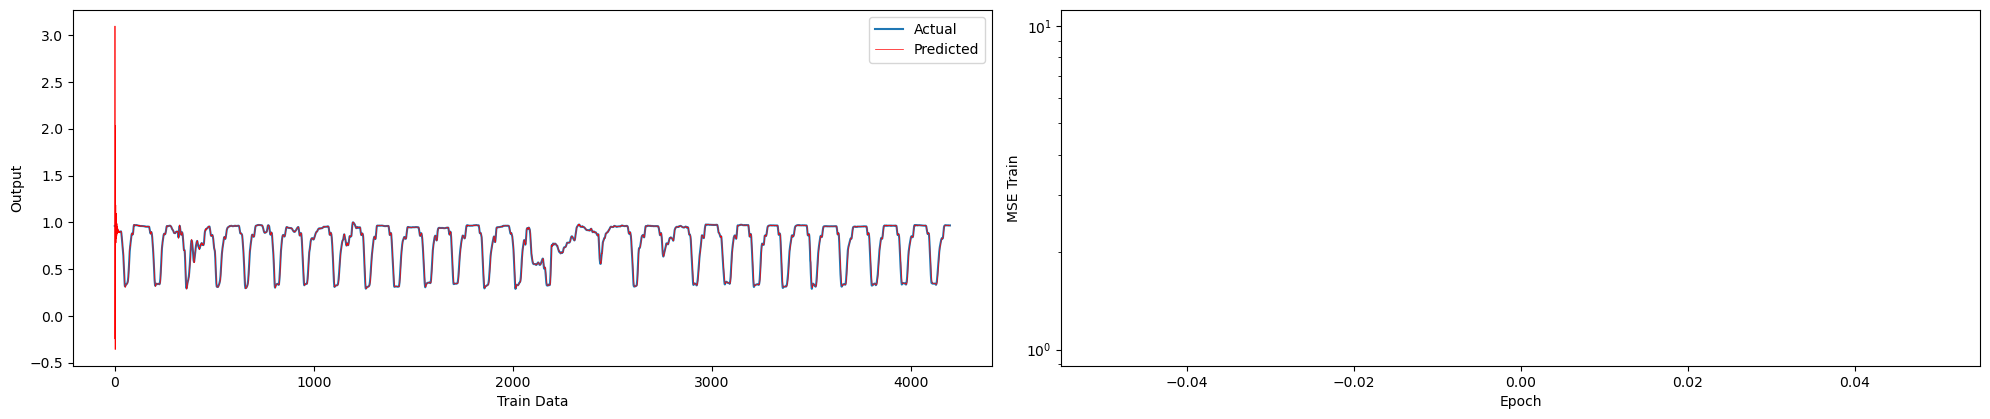


*****************************************************************************************************************************
epoch:  1
Epoch: 2 	
total_error:  [68.13779319]
MSE_train: 0.0011


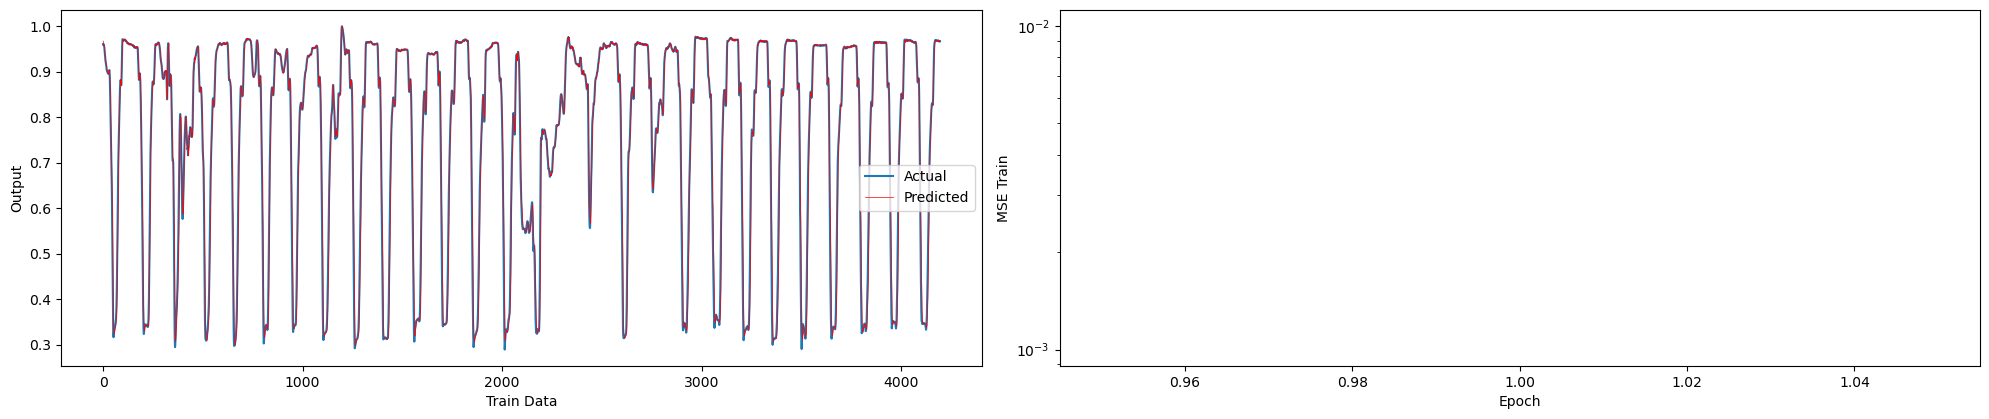


*****************************************************************************************************************************
epoch:  2
Epoch: 3 	
total_error:  [85.27568756]
MSE_train: 0.0017


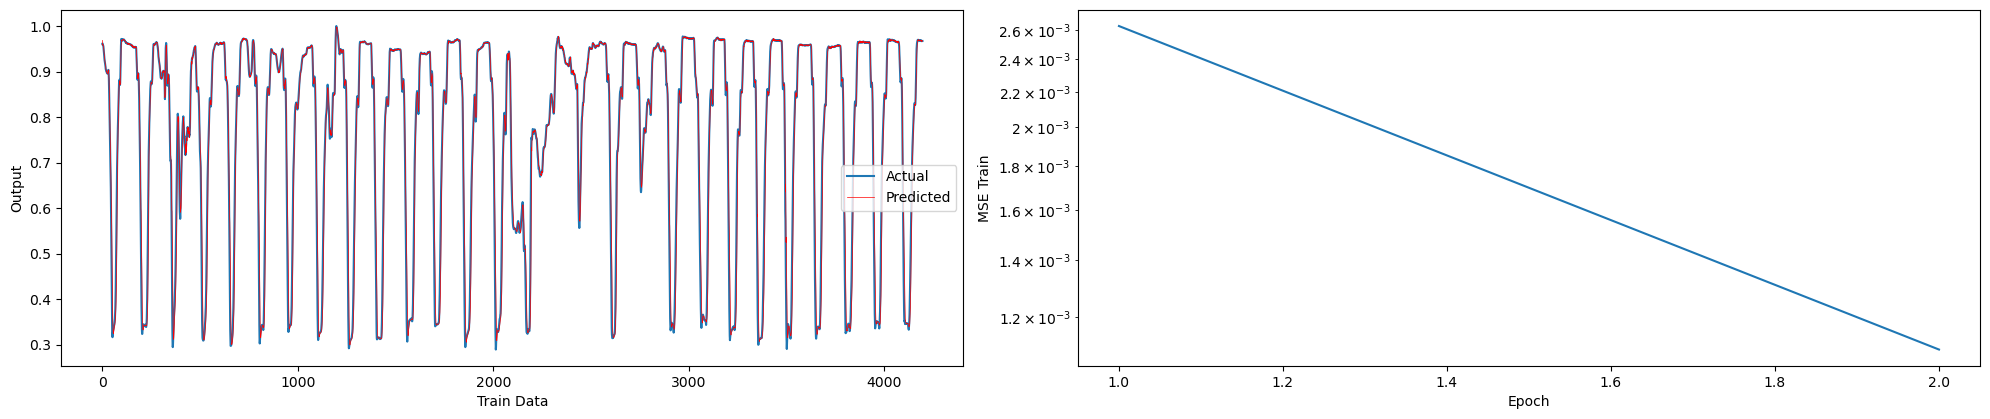


*****************************************************************************************************************************
epoch:  3
Epoch: 4 	
total_error:  [97.07110393]
MSE_train: 0.0020


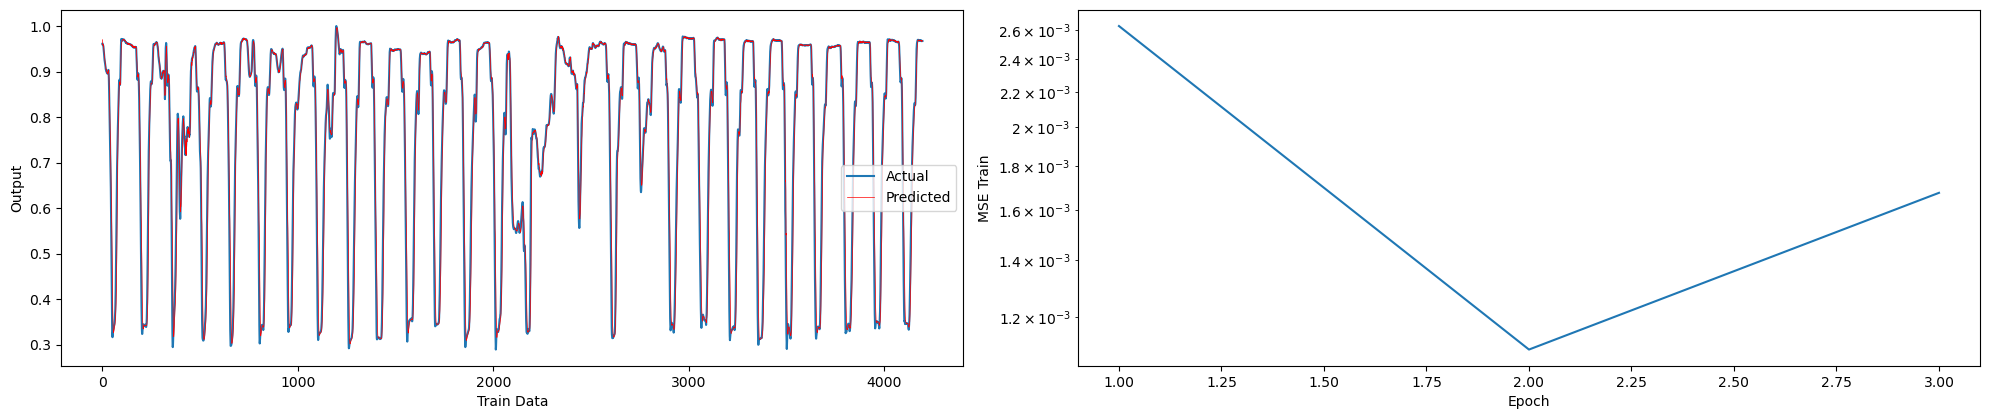


*****************************************************************************************************************************
epoch:  4
Epoch: 5 	
total_error:  [100.66783815]
MSE_train: 0.0019


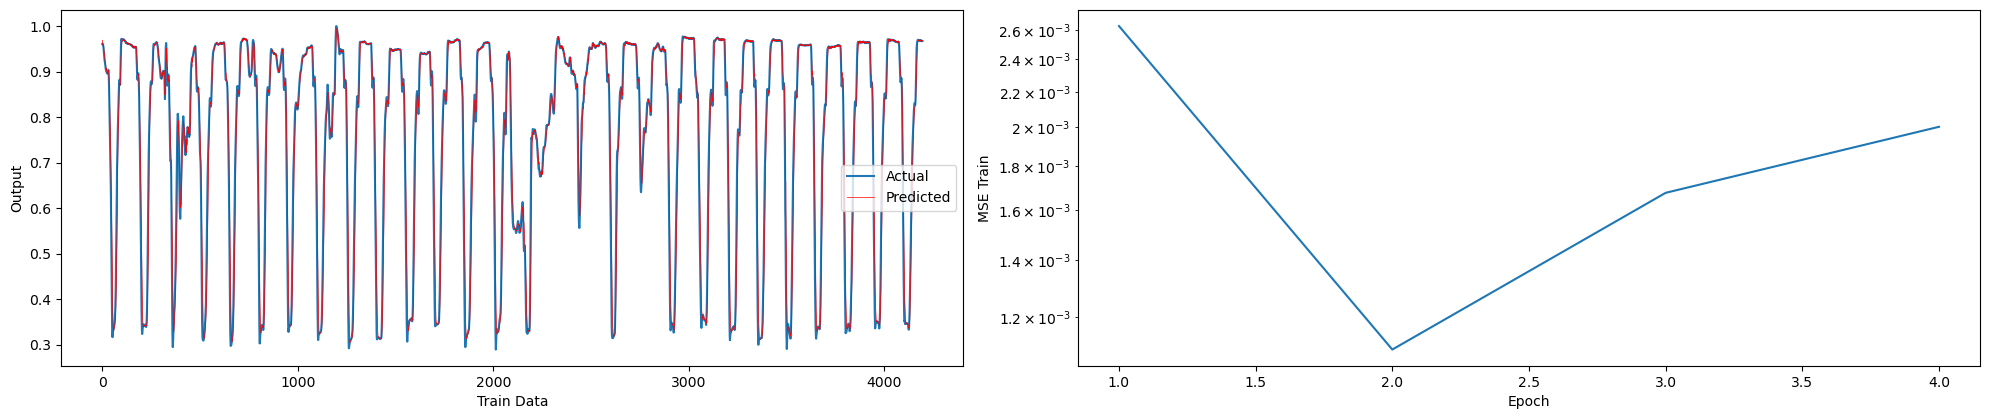


*****************************************************************************************************************************
epoch:  5
Epoch: 6 	
total_error:  [88.83631592]
MSE_train: 0.0014


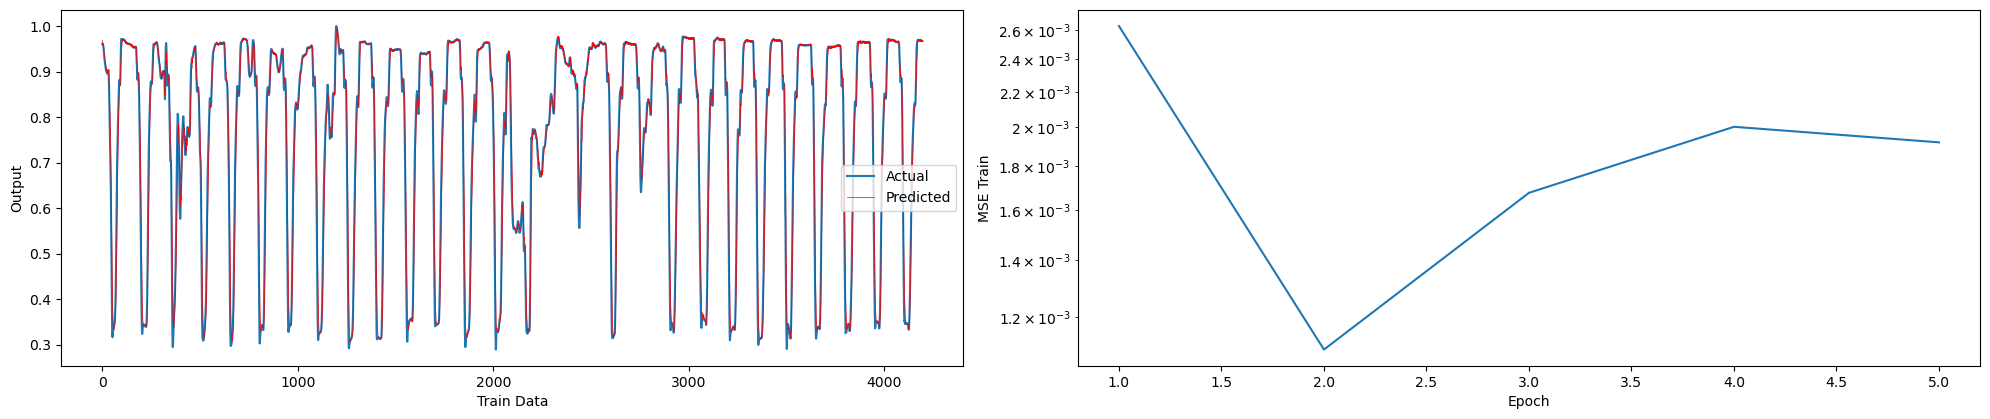


*****************************************************************************************************************************
epoch:  6
Epoch: 7 	
total_error:  [67.33107752]
MSE_train: 0.0008


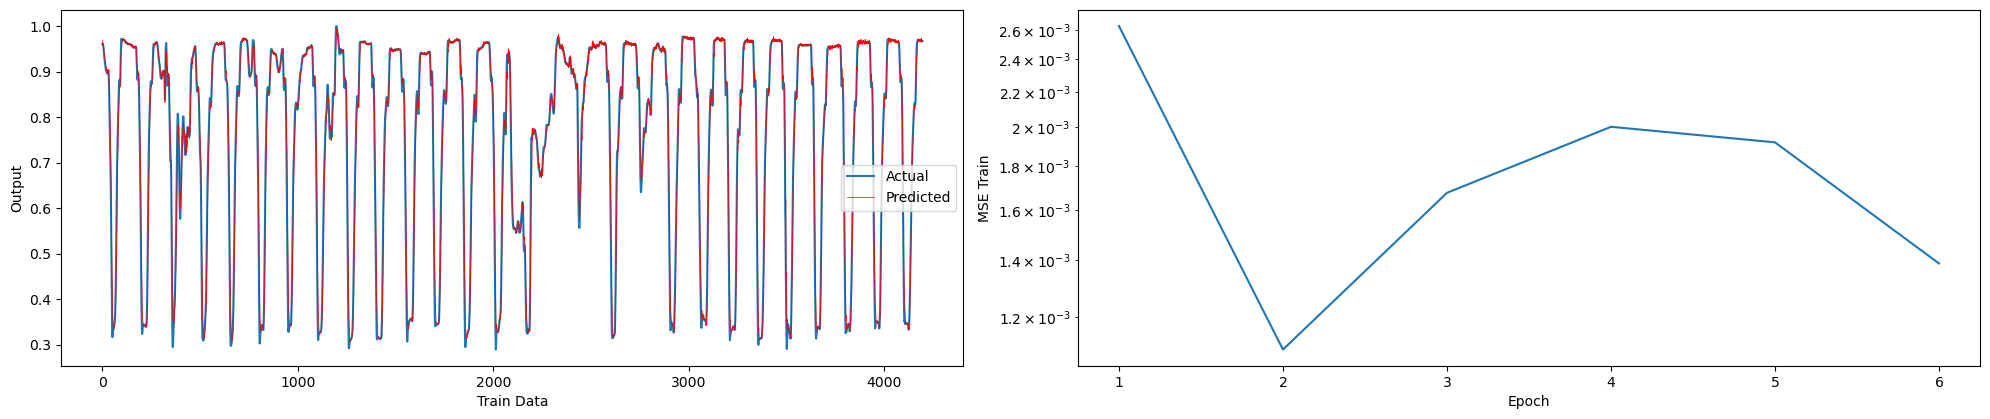


*****************************************************************************************************************************
epoch:  7
Epoch: 8 	
total_error:  [41.75545886]
MSE_train: 0.0003


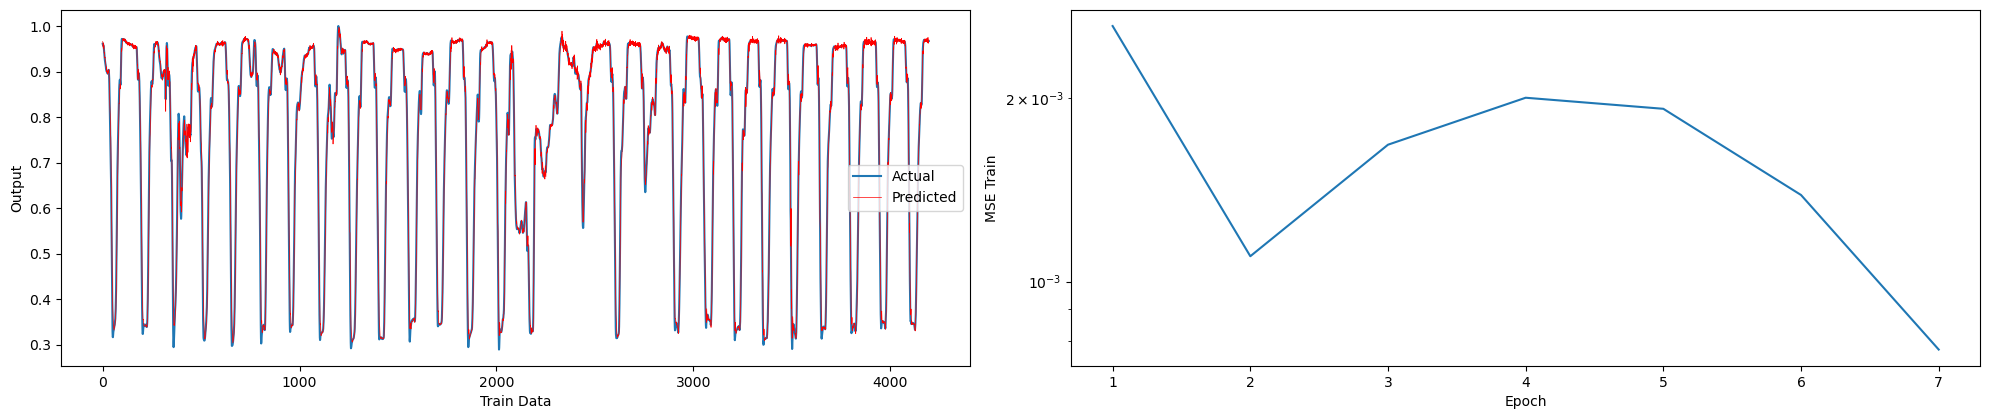


*****************************************************************************************************************************
epoch:  8
Epoch: 9 	
total_error:  [26.39634148]
MSE_train: 0.0001


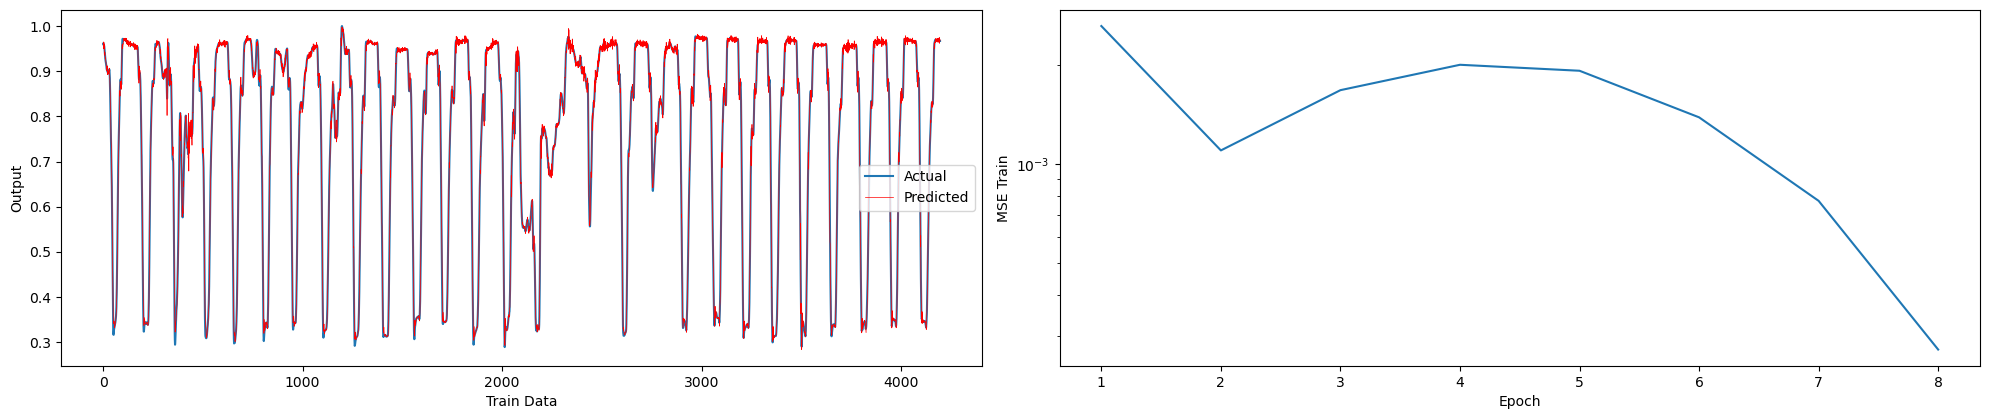


*****************************************************************************************************************************
epoch:  9
Epoch: 10 	
total_error:  [25.28781888]
MSE_train: 0.0001


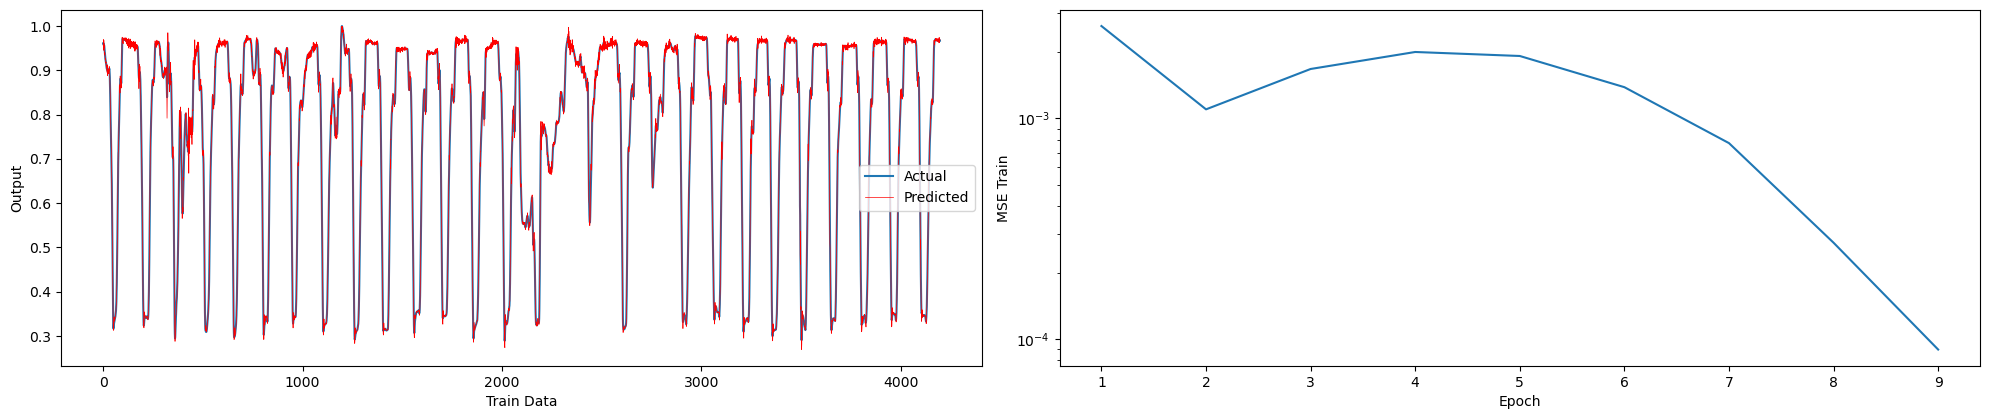


*****************************************************************************************************************************
epoch:  10
Epoch: 11 	
total_error:  [21.80146632]
MSE_train: 0.0001


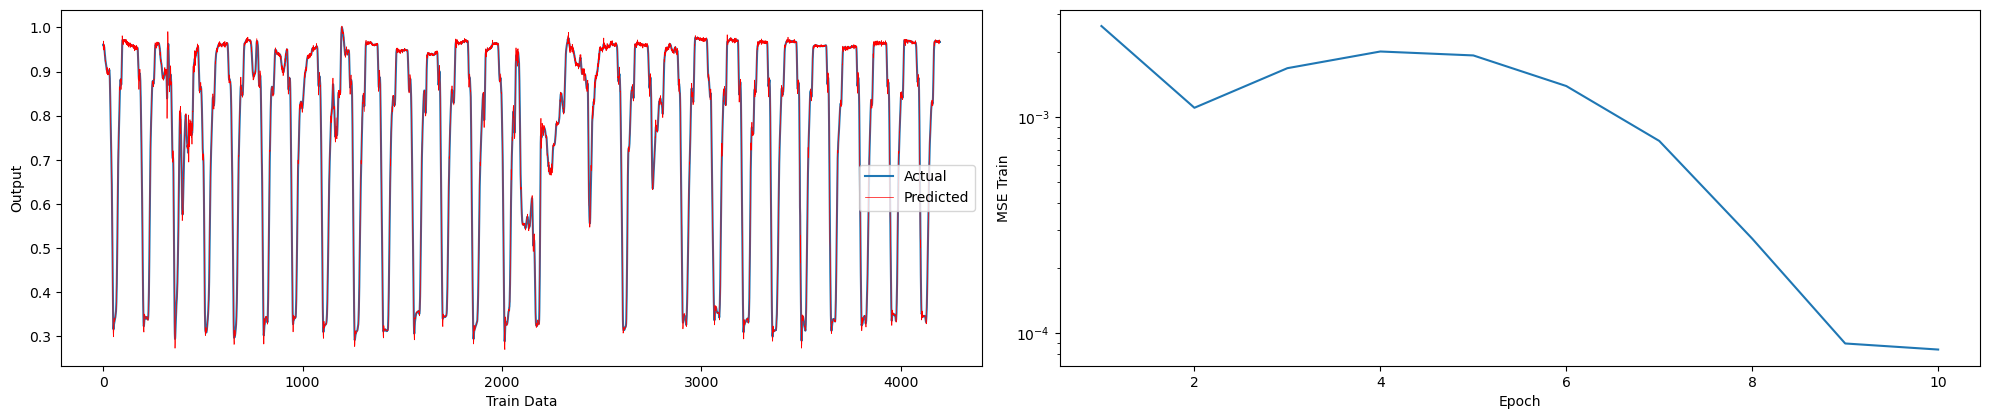


*****************************************************************************************************************************
epoch:  11
Epoch: 12 	
total_error:  [18.95265133]
MSE_train: 0.0000


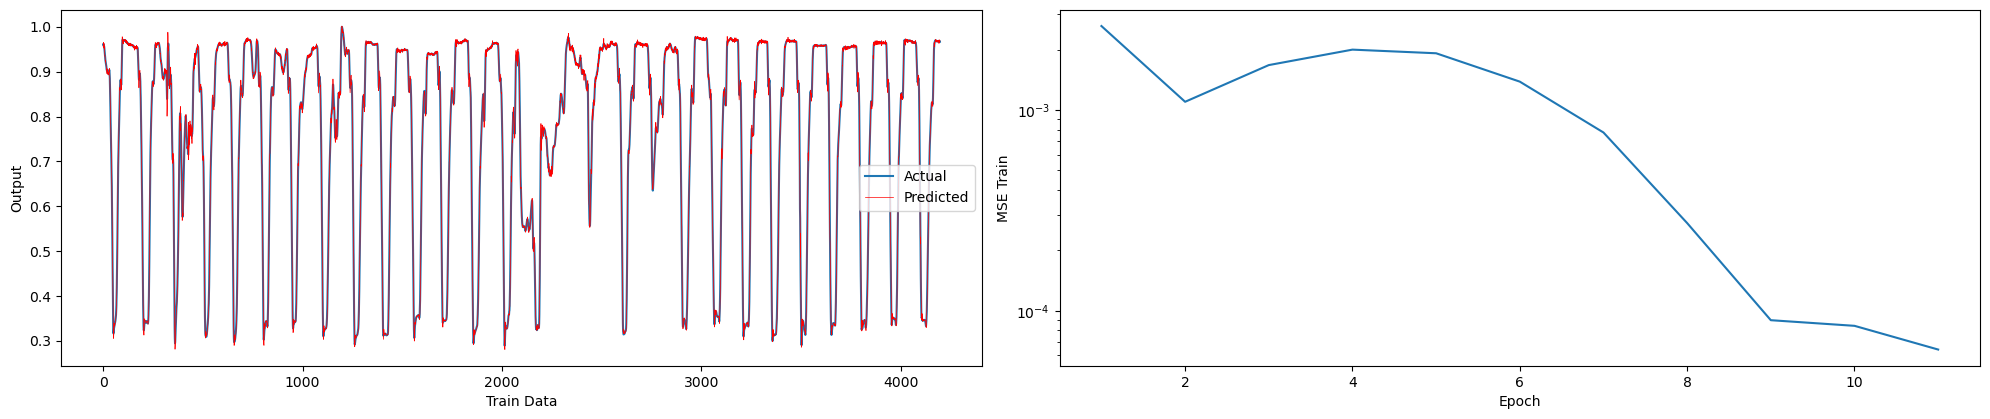


*****************************************************************************************************************************
epoch:  12
Epoch: 13 	
total_error:  [20.33611081]
MSE_train: 0.0001


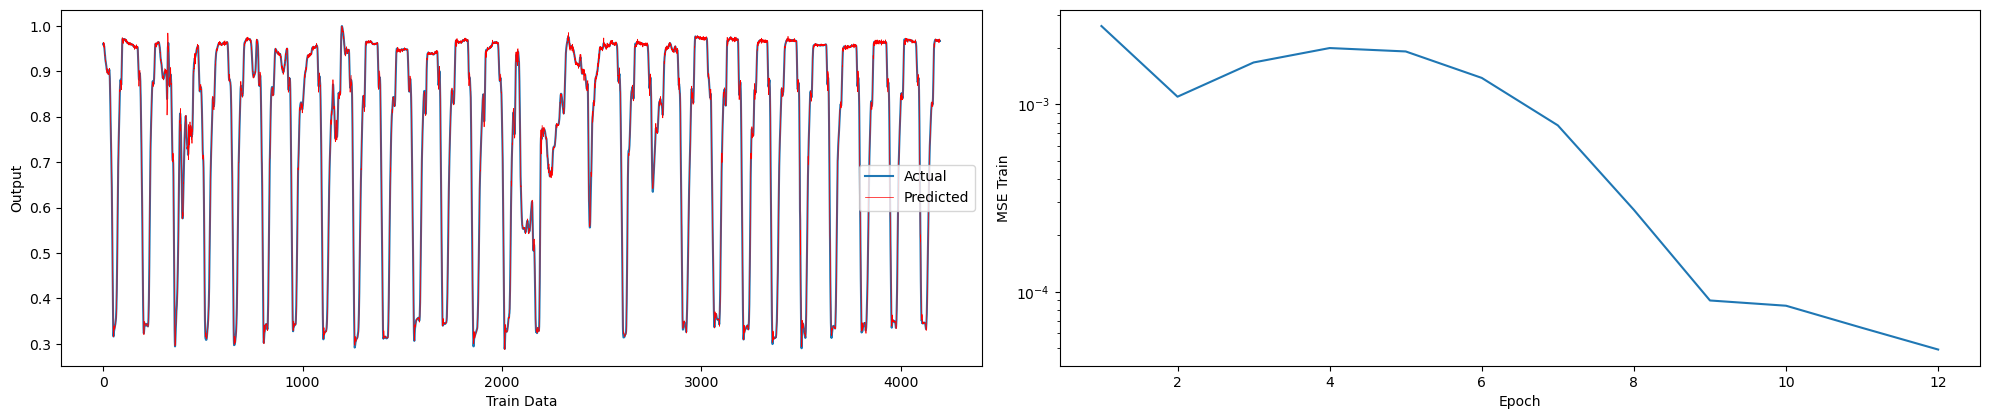


*****************************************************************************************************************************
epoch:  13
Epoch: 14 	
total_error:  [21.24352703]
MSE_train: 0.0001


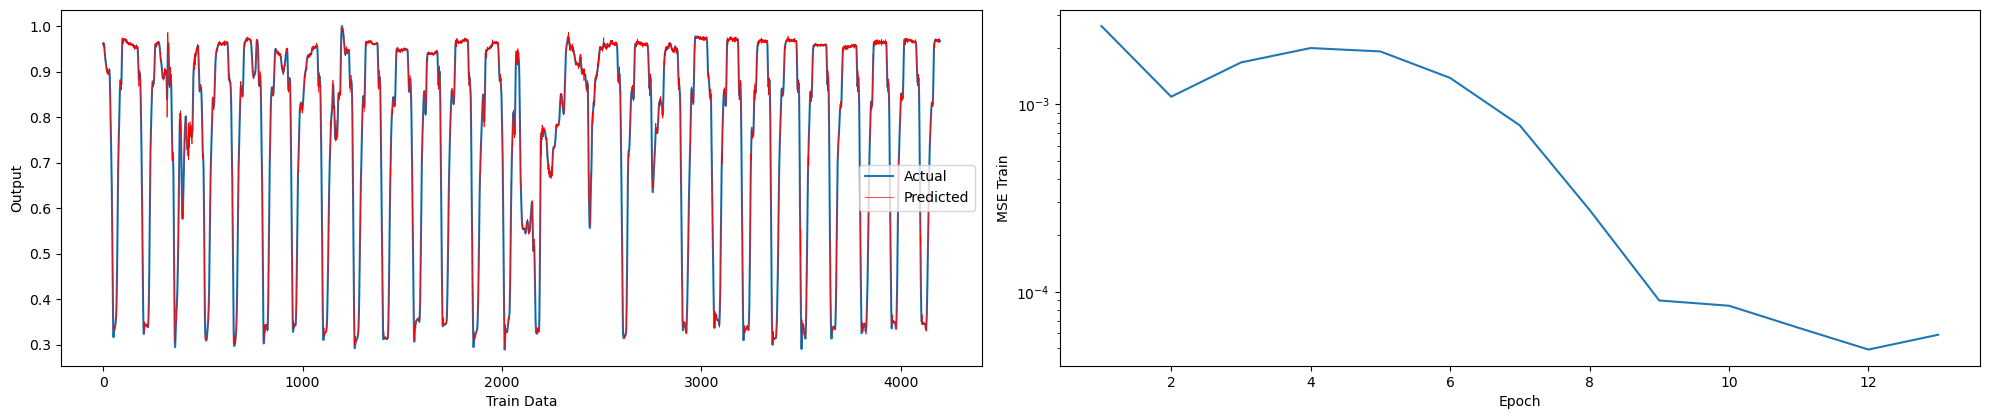


*****************************************************************************************************************************
epoch:  14
Epoch: 15 	
total_error:  [20.83262852]
MSE_train: 0.0001


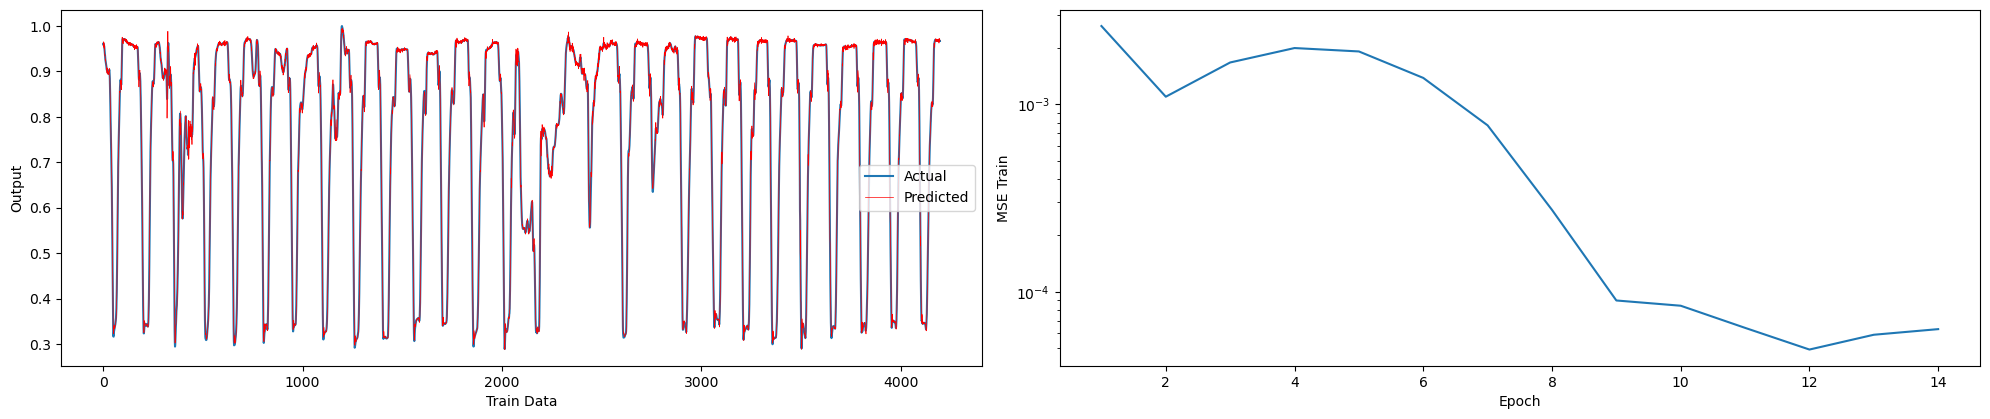


*****************************************************************************************************************************
epoch:  15
Epoch: 16 	
total_error:  [20.25948626]
MSE_train: 0.0001


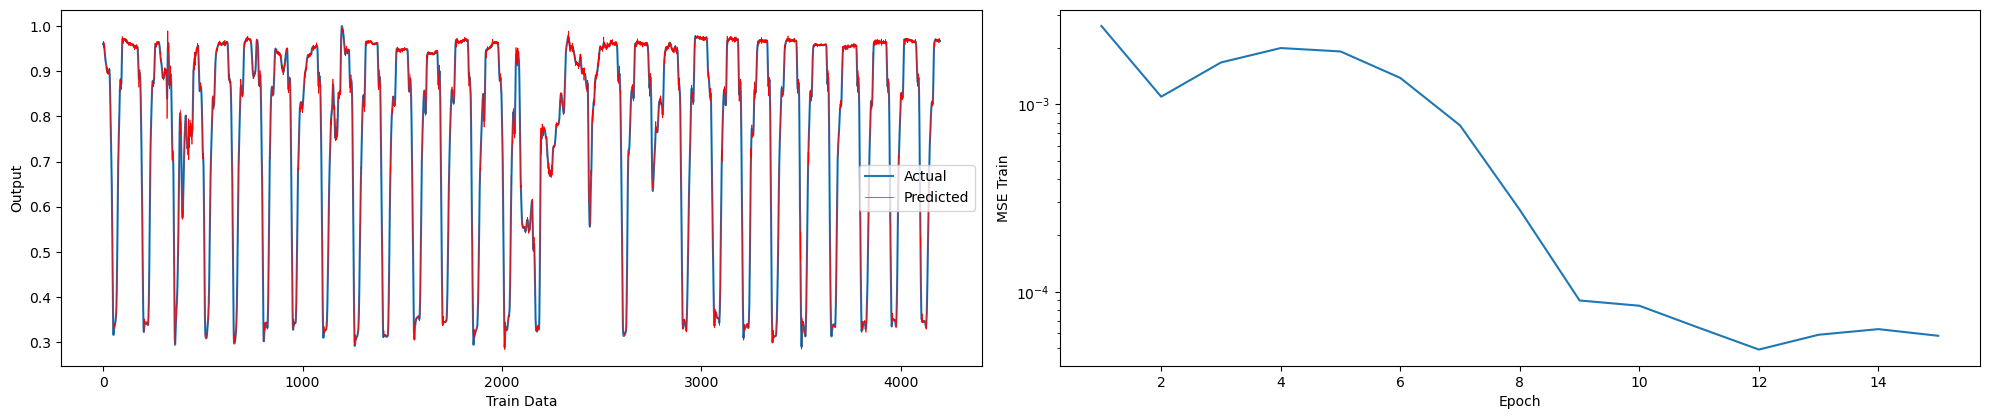


*****************************************************************************************************************************
epoch:  16
Epoch: 17 	
total_error:  [19.81960143]
MSE_train: 0.0001


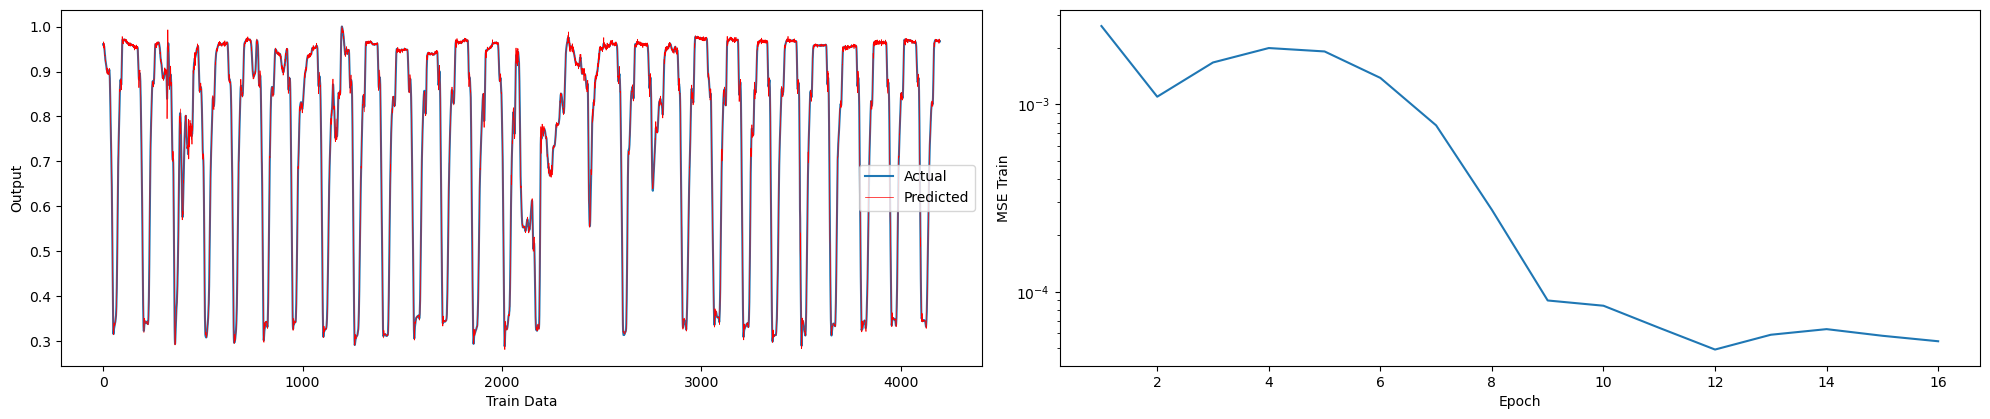


*****************************************************************************************************************************
epoch:  17
Epoch: 18 	
total_error:  [19.59355911]
MSE_train: 0.0001


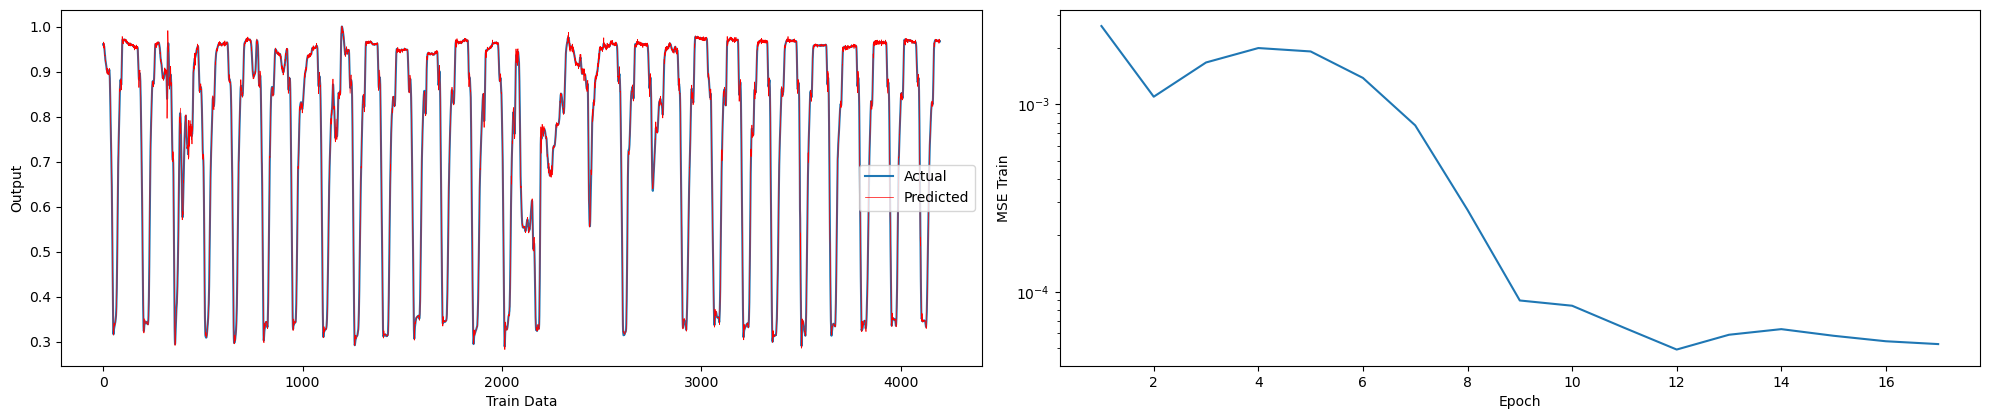


*****************************************************************************************************************************
epoch:  18
Epoch: 19 	
total_error:  [19.67003819]
MSE_train: 0.0001


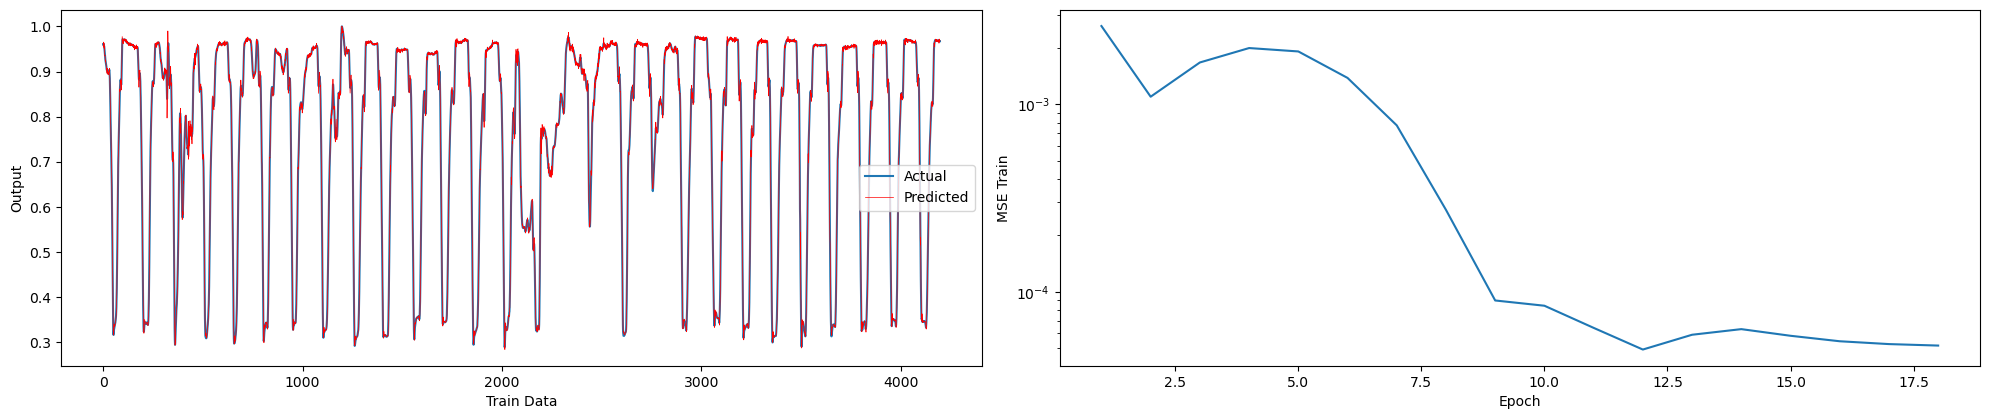


*****************************************************************************************************************************
epoch:  19
Epoch: 20 	
total_error:  [19.87018328]
MSE_train: 0.0001


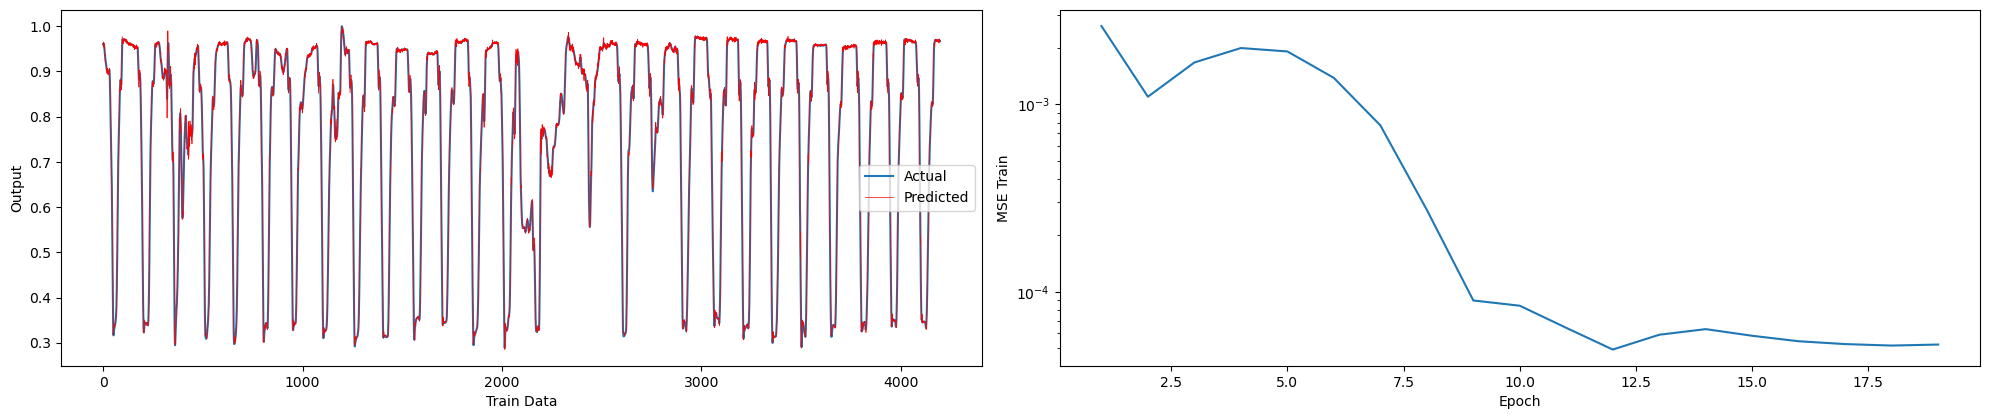


*****************************************************************************************************************************
epoch:  20
Epoch: 21 	
total_error:  [19.98834563]
MSE_train: 0.0001


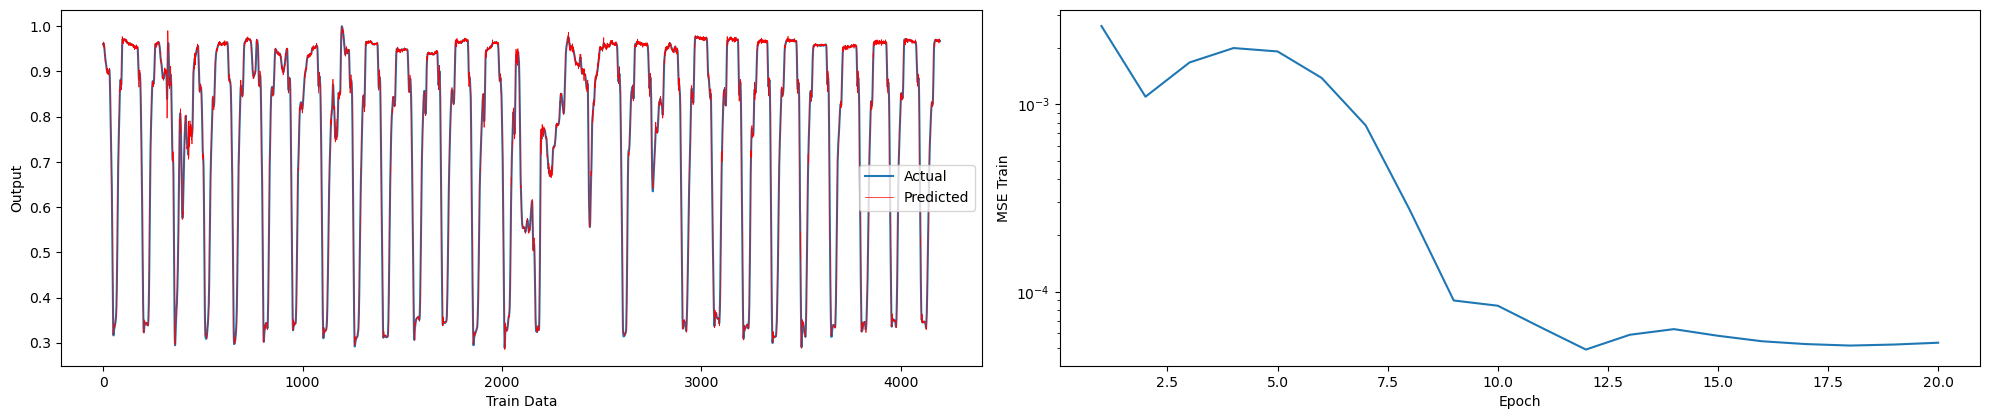


*****************************************************************************************************************************
epoch:  21
Epoch: 22 	
total_error:  [20.00188224]
MSE_train: 0.0001


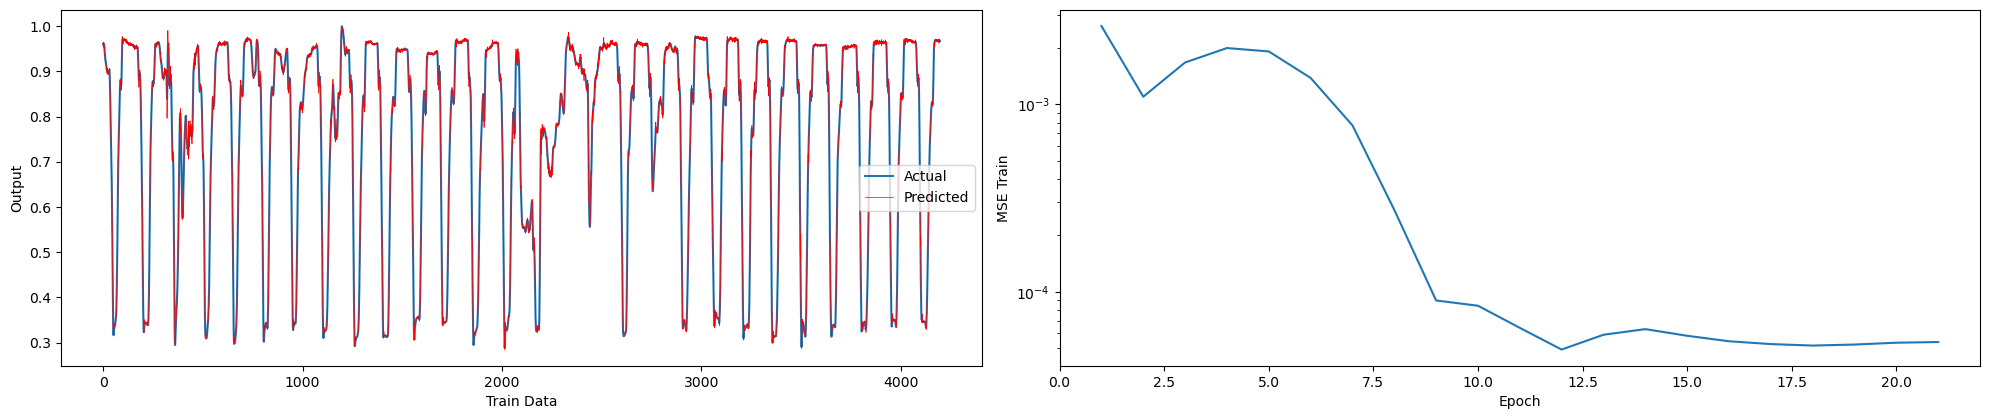


*****************************************************************************************************************************
epoch:  22
Epoch: 23 	
total_error:  [19.97893747]
MSE_train: 0.0001


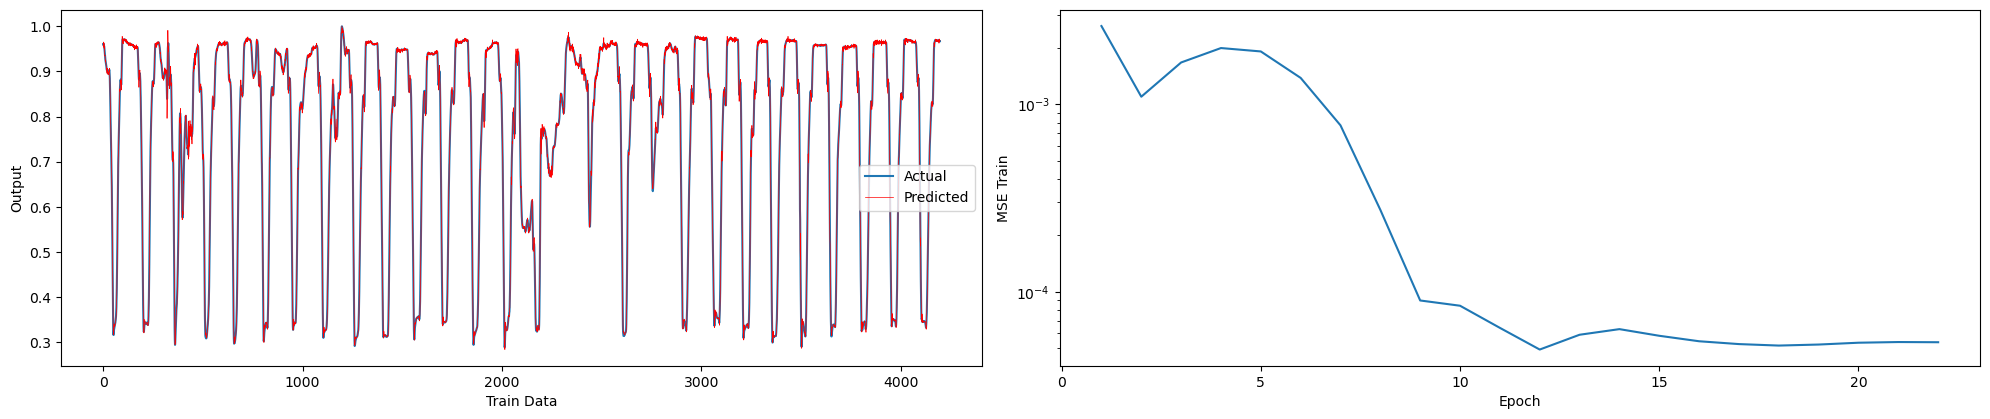


*****************************************************************************************************************************
epoch:  23
Epoch: 24 	
total_error:  [19.96182151]
MSE_train: 0.0001


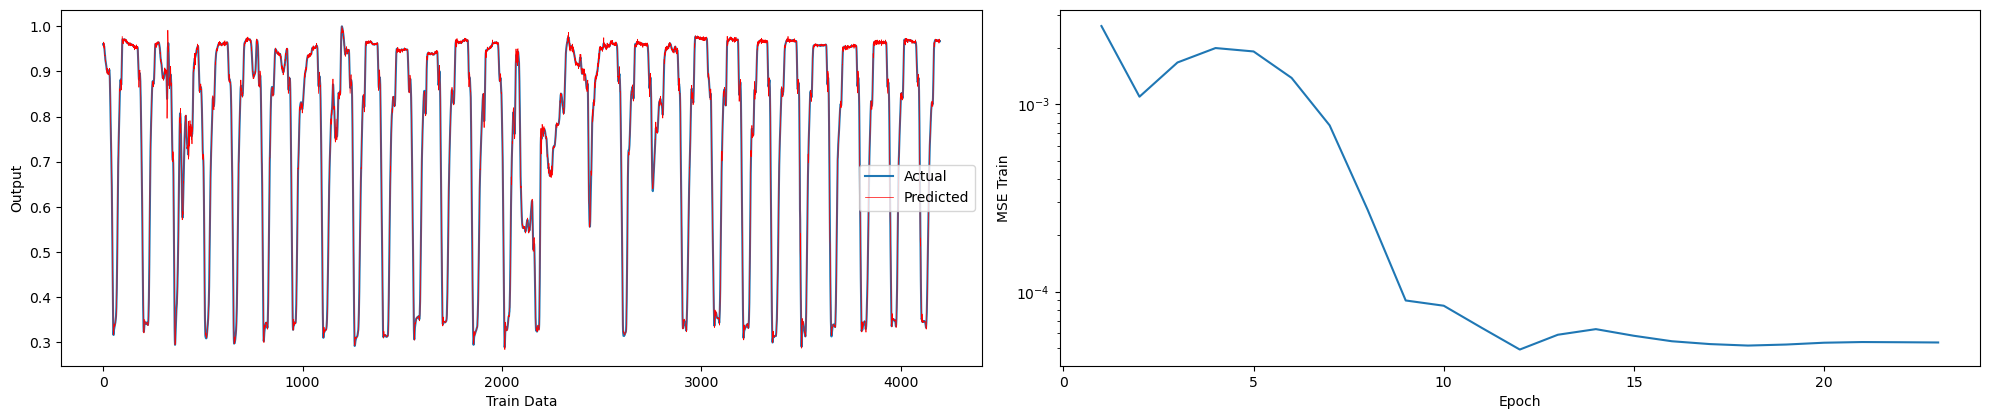


*****************************************************************************************************************************
epoch:  24
Epoch: 25 	
total_error:  [19.98049436]
MSE_train: 0.0001


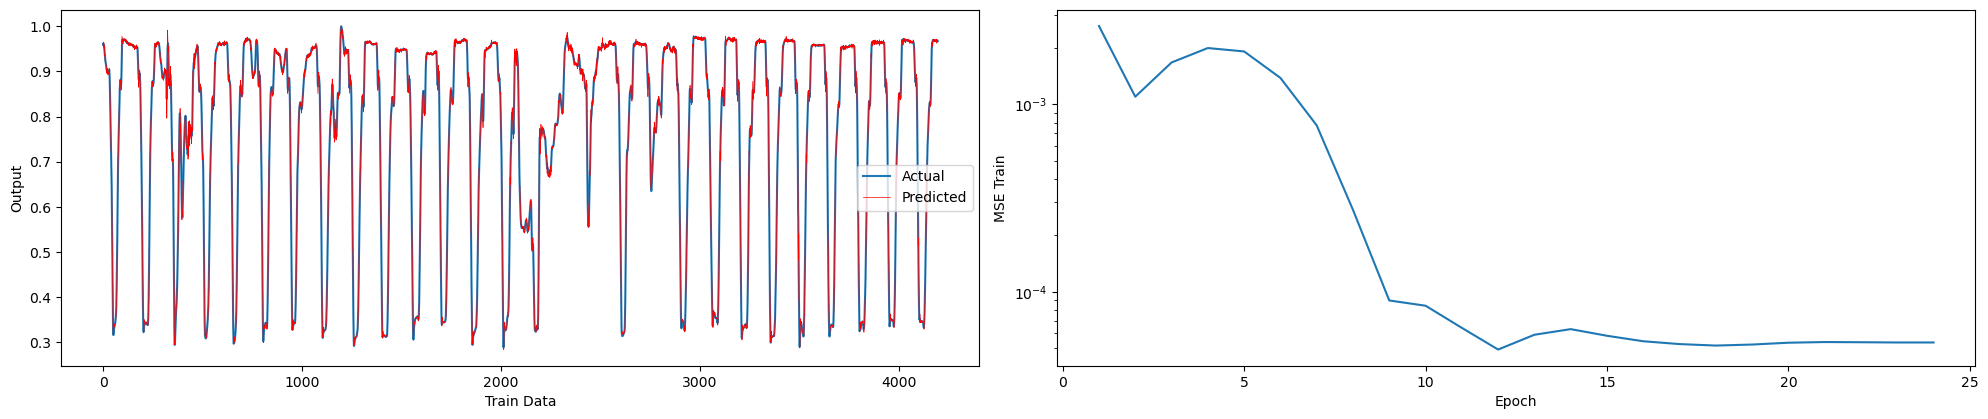


*****************************************************************************************************************************
epoch:  25
Epoch: 26 	
total_error:  [20.04159276]
MSE_train: 0.0001


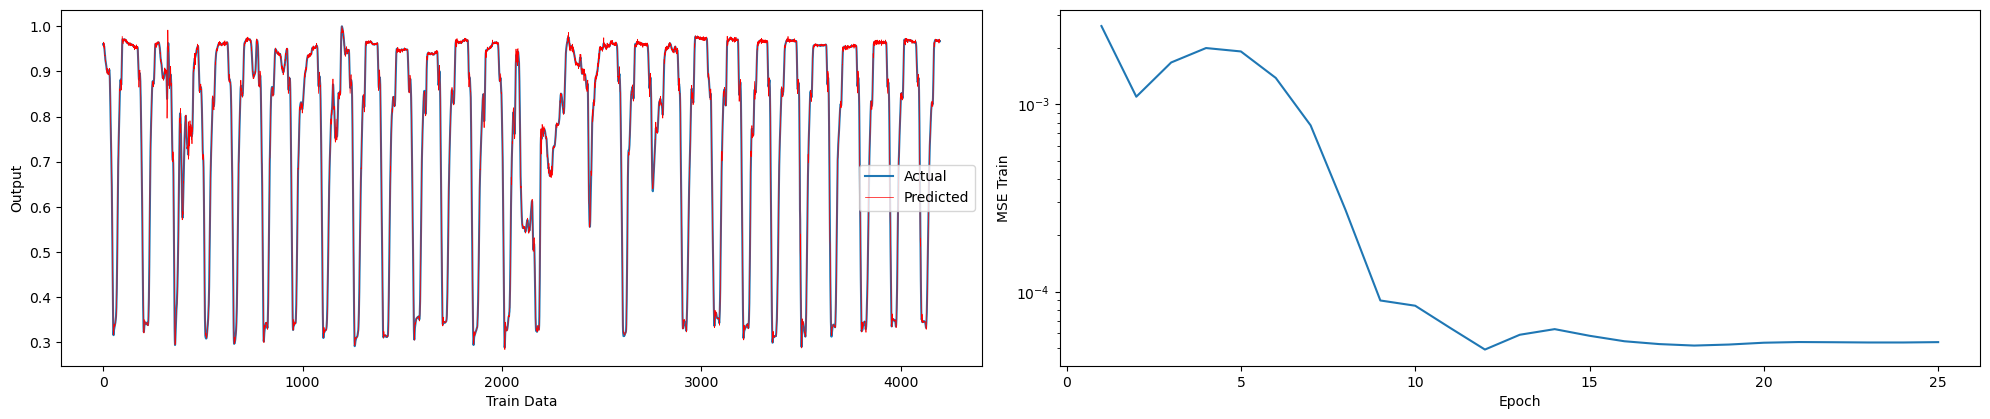


*****************************************************************************************************************************
epoch:  26
Epoch: 27 	
total_error:  [20.09989356]
MSE_train: 0.0001


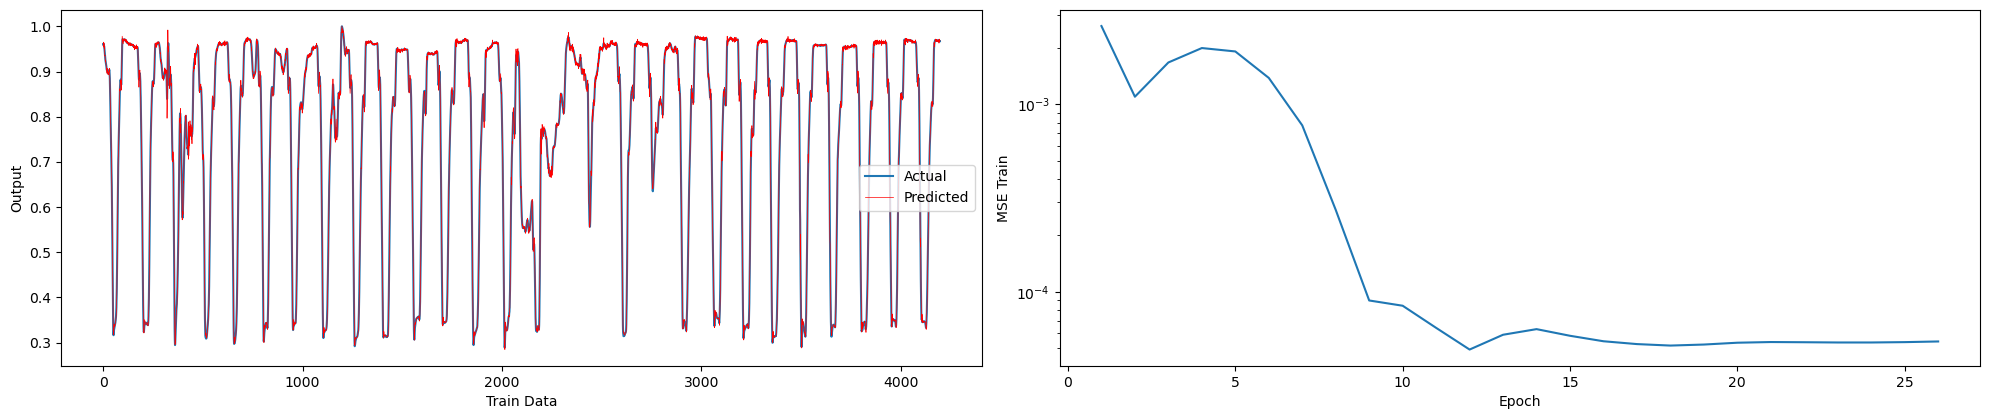


*****************************************************************************************************************************
epoch:  27
Epoch: 28 	
total_error:  [20.15594607]
MSE_train: 0.0001


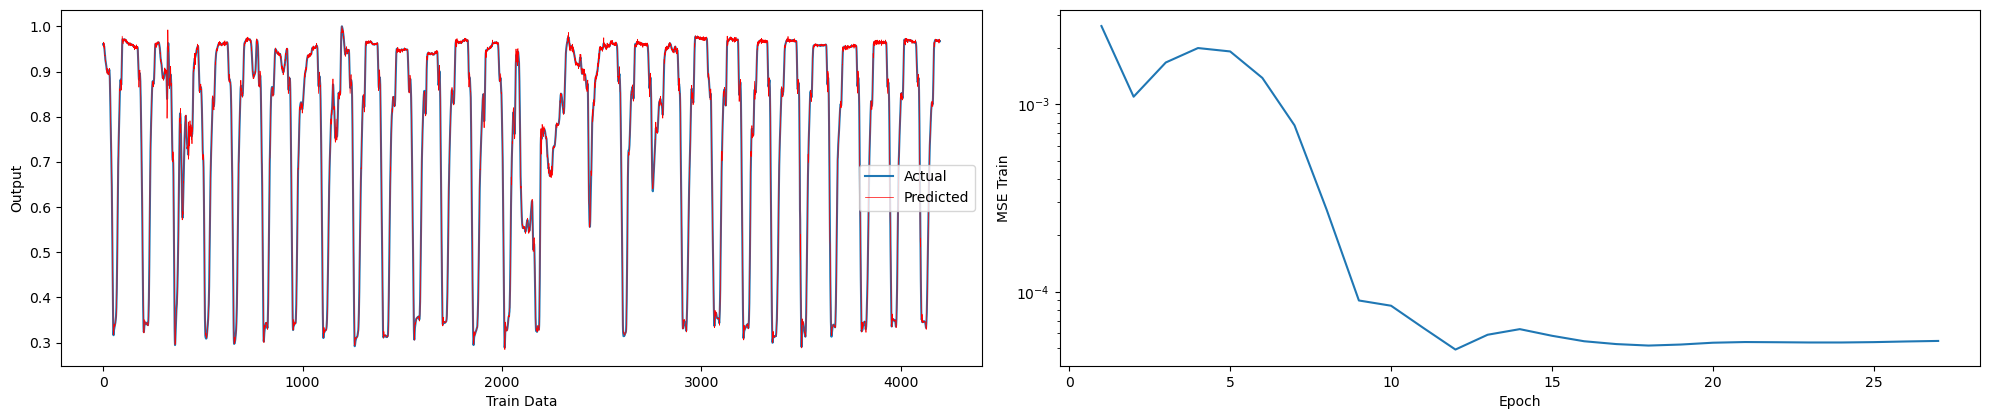


*****************************************************************************************************************************
epoch:  28
Epoch: 29 	
total_error:  [20.19851681]
MSE_train: 0.0001


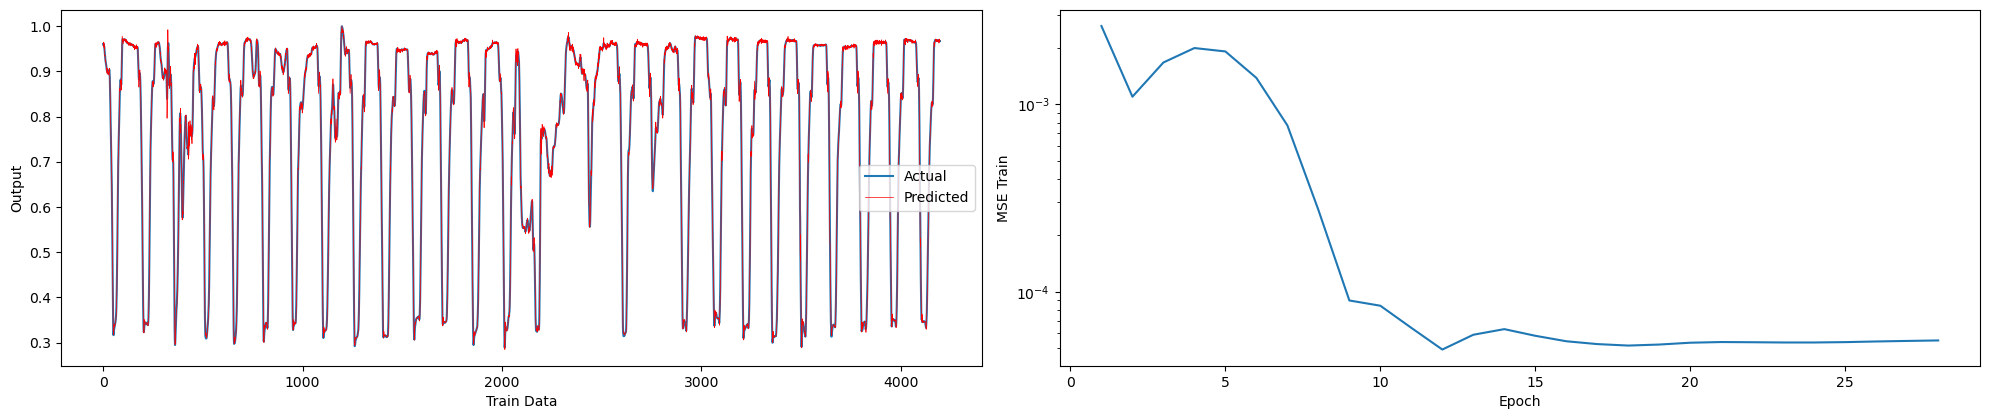


*****************************************************************************************************************************
epoch:  29
Epoch: 30 	
total_error:  [20.22786306]
MSE_train: 0.0001


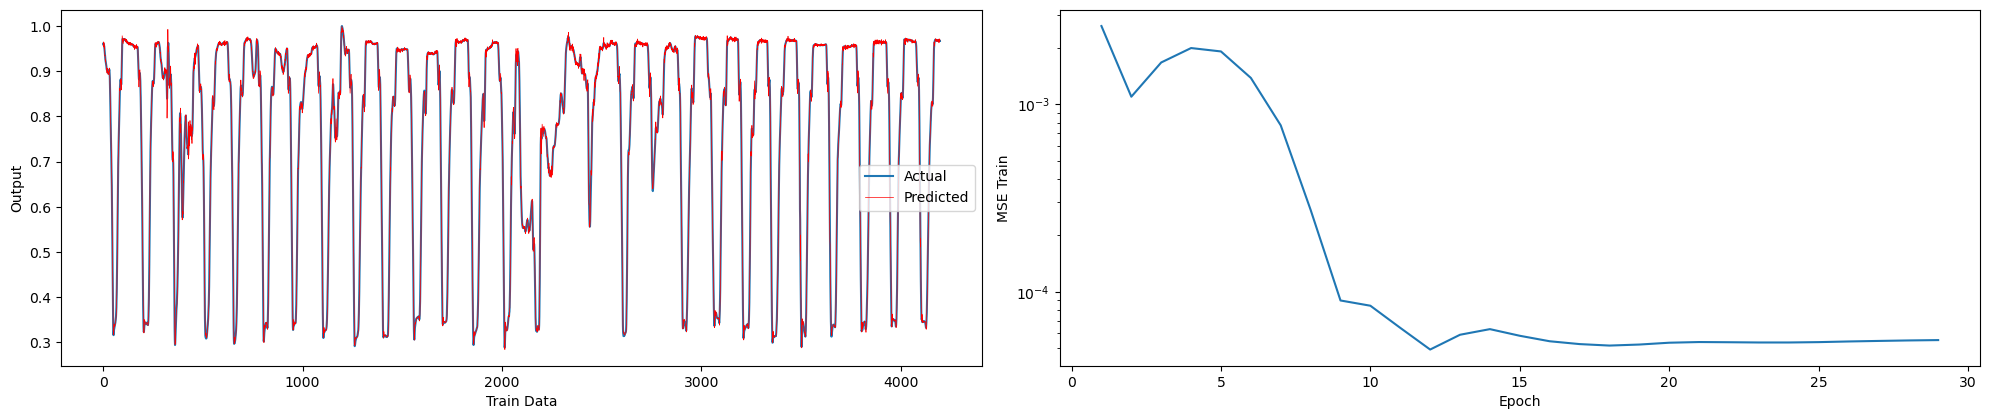


*****************************************************************************************************************************
epoch:  30
Epoch: 31 	
total_error:  [20.26877756]
MSE_train: 0.0001


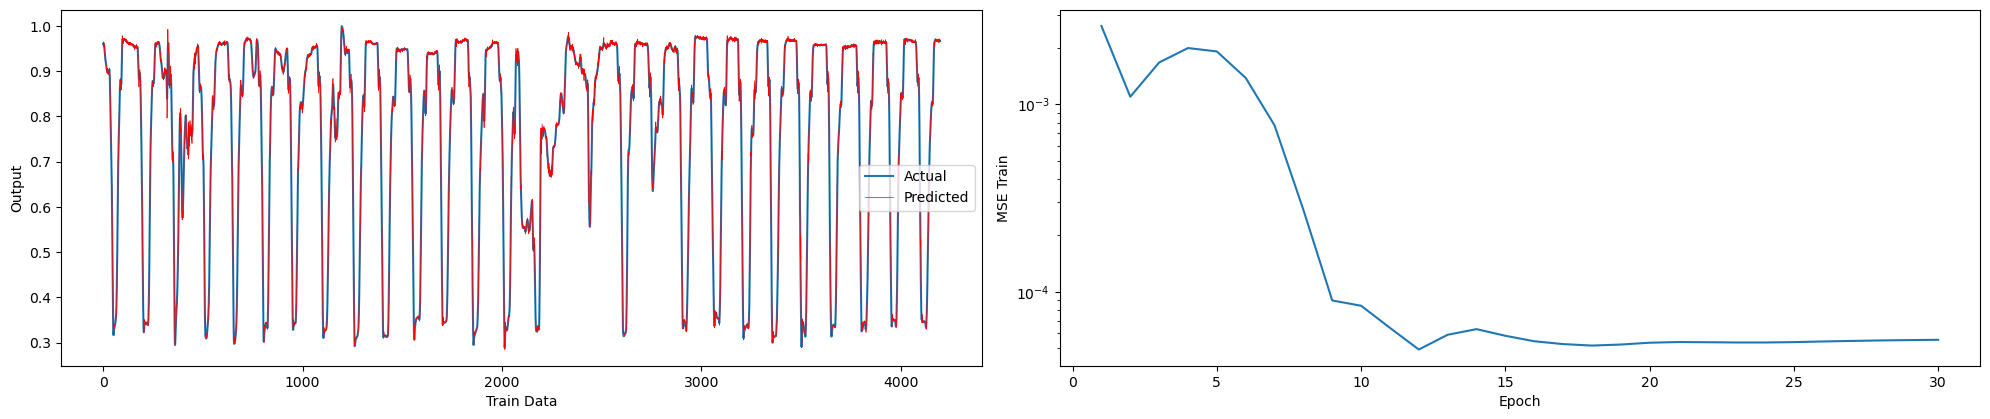


*****************************************************************************************************************************
epoch:  31
Epoch: 32 	
total_error:  [20.30741888]
MSE_train: 0.0001


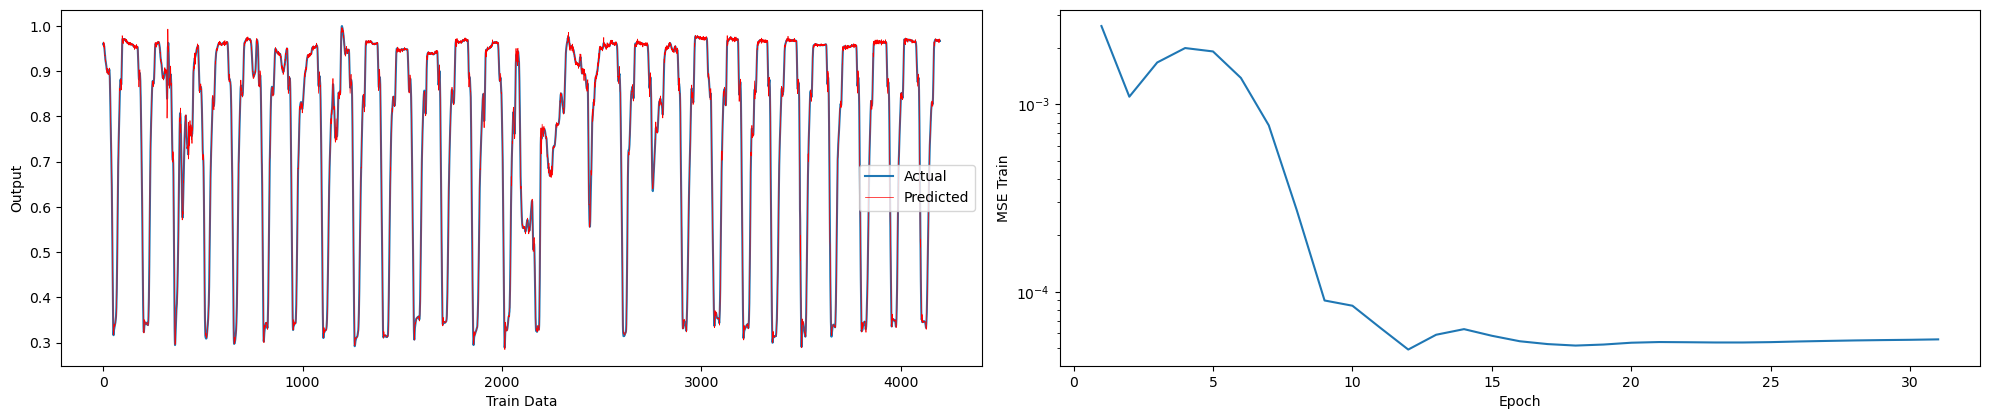


*****************************************************************************************************************************
epoch:  32
Epoch: 33 	
total_error:  [20.35081463]
MSE_train: 0.0001


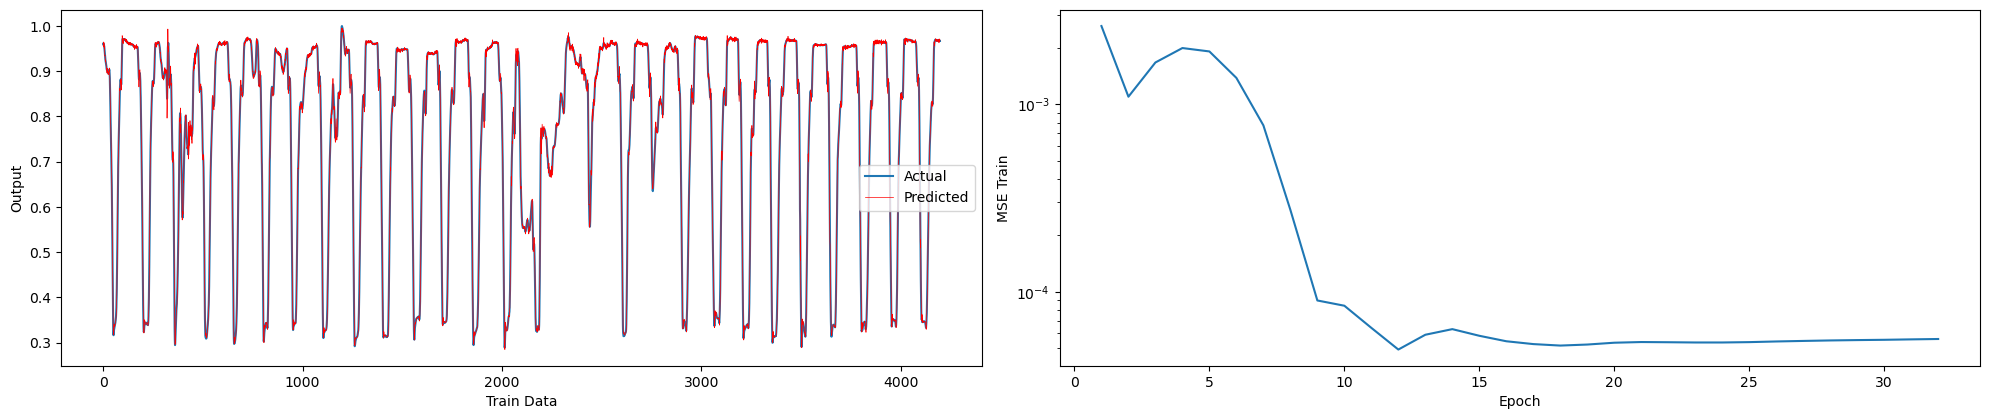


*****************************************************************************************************************************
epoch:  33
Epoch: 34 	
total_error:  [20.39784901]
MSE_train: 0.0001


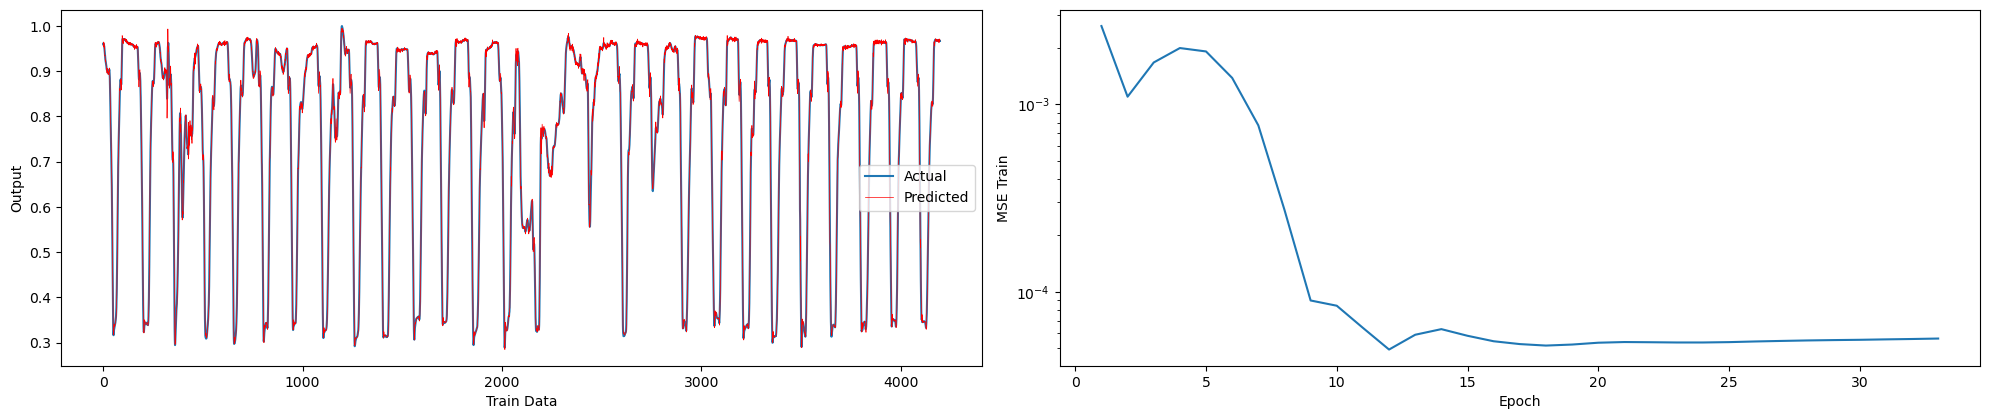


*****************************************************************************************************************************
epoch:  34
Epoch: 35 	
total_error:  [20.43653309]
MSE_train: 0.0001


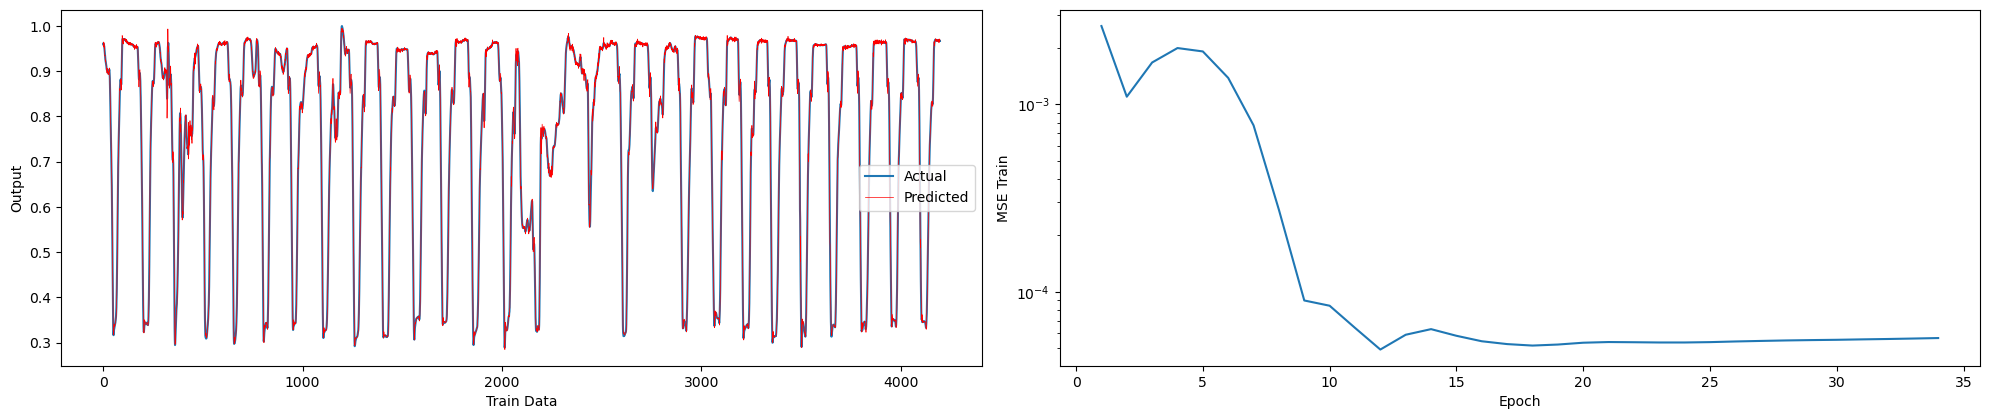


*****************************************************************************************************************************
epoch:  35
Epoch: 36 	
total_error:  [20.46097969]
MSE_train: 0.0001


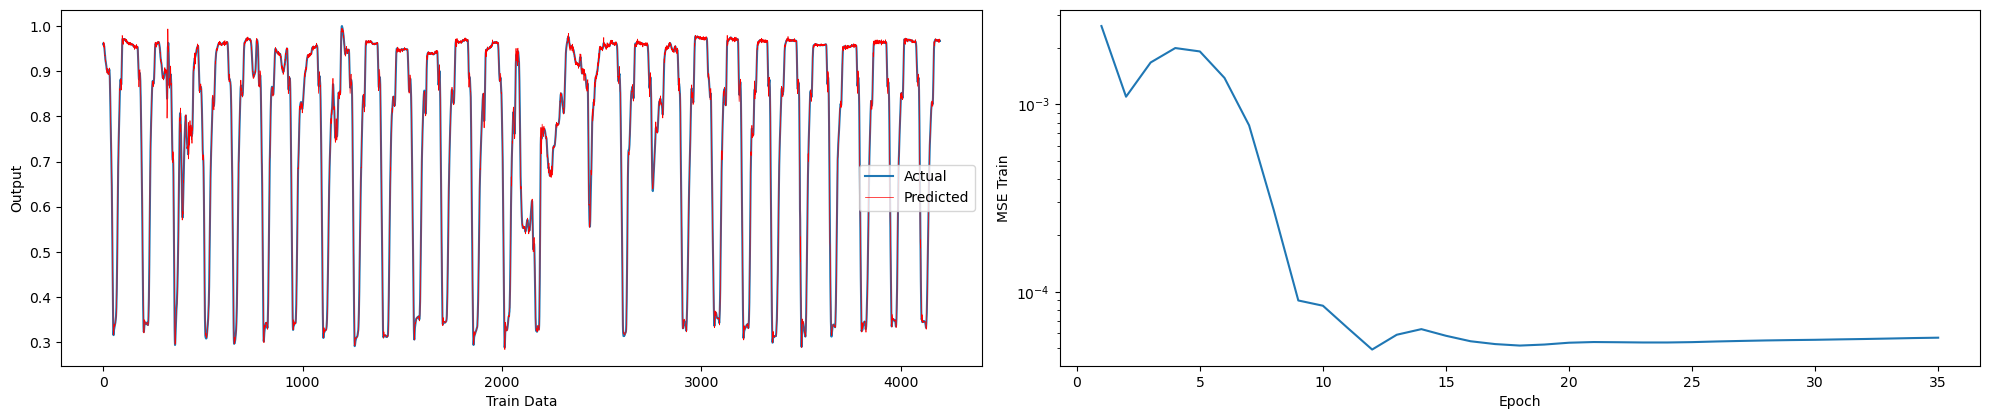


*****************************************************************************************************************************
epoch:  36
Epoch: 37 	
total_error:  [20.47750872]
MSE_train: 0.0001


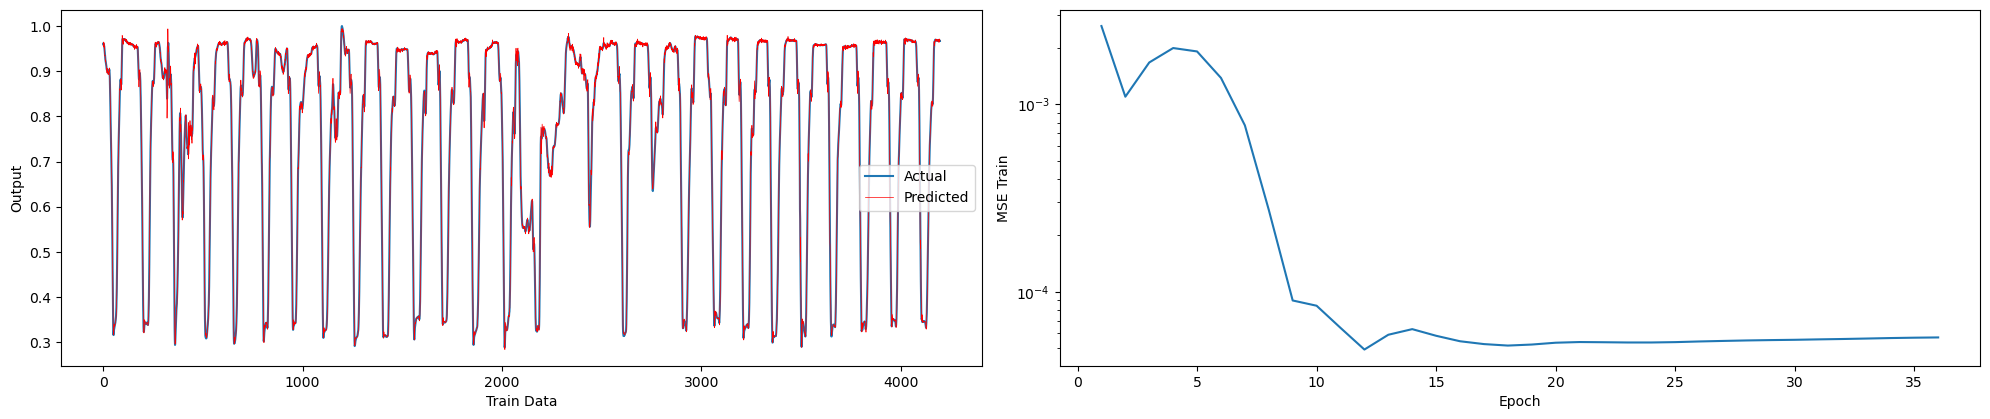


*****************************************************************************************************************************
epoch:  37
Epoch: 38 	
total_error:  [20.48077273]
MSE_train: 0.0001


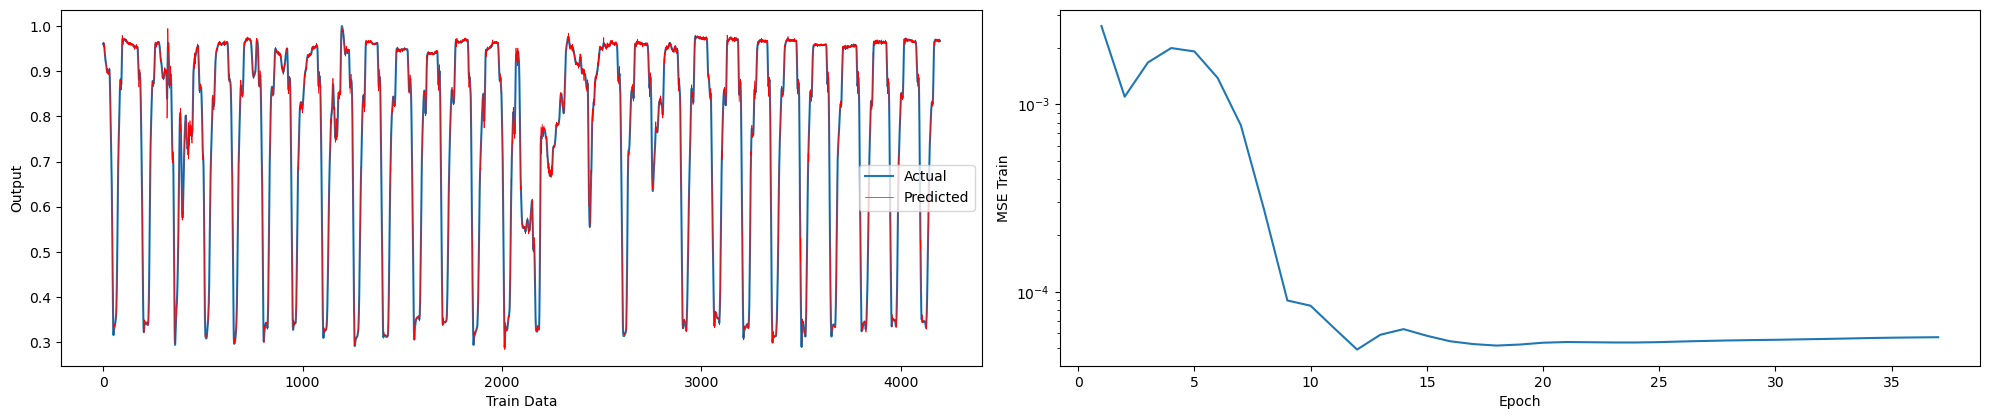


*****************************************************************************************************************************
epoch:  38
Epoch: 39 	
total_error:  [20.49591074]
MSE_train: 0.0001


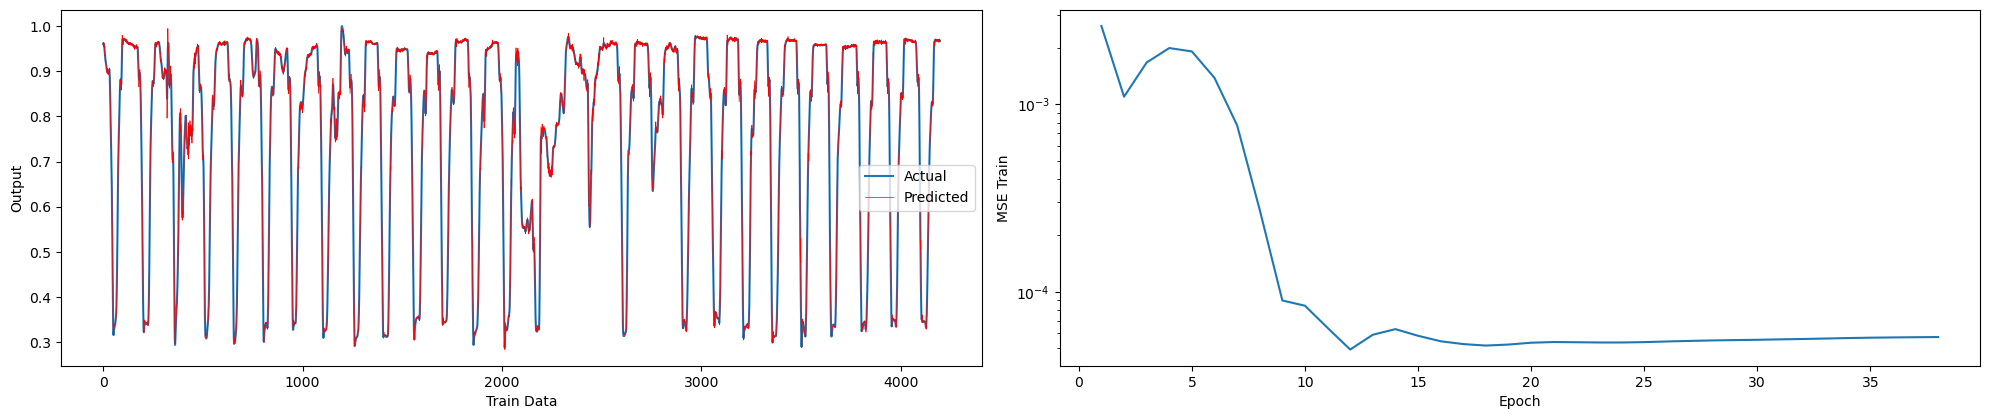


*****************************************************************************************************************************
epoch:  39
Epoch: 40 	
total_error:  [20.47571917]
MSE_train: 0.0001


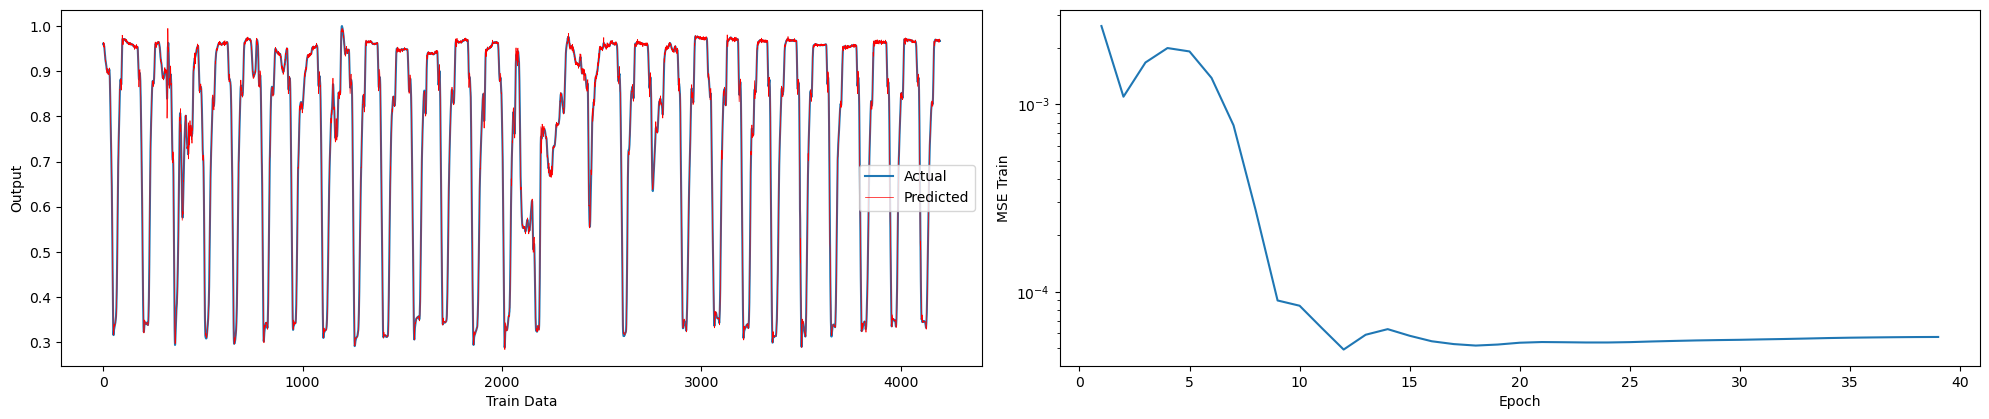


*****************************************************************************************************************************
****************************** Training completed *******************************


In [9]:
# Training the MLP for regression
for epoch in range(epochs):
# for epoch in range(2):
    print('epoch: ', epoch)
    # Shuffle the training data in each epoch
#     shuffle_indices = np.arange(len(X_train))
#     np.random.shuffle(shuffle_indices)
#     X_train = X_train[shuffle_indices]
#     y_train = y_train[shuffle_indices]


    total_error = 0
    error_data_train = np.zeros(len(X_train))
    output_data_train = np.zeros(len(X_train))
    for i in range(len(X_train)):
#     for i in range(2):  
        #-------------------------------- Feed Forward -------------------------------------
        input_layer = X_train[i:i+1]
        #print(input_layer.shape)

        net1 = np.dot(input_layer, w1)   # net1 = x * w1
        o1   = Function1(net1,𝛼1,𝛽1,𝛾1,𝛿1) #  o1 = f(net1)
#         print('o1: ', o1)
        net2 = np.dot(o1, w2) # net2 = o1 * w2
#         print('net2: ', net2)
        o2   = Function1(net2,𝛼2,𝛽2,𝛾2,𝛿2) #  o2 = f(net2)
#         print('o2: ', o2)
        net3 = np.dot(o2, w3)   # net3 = o2 * w3
#         print('net3: ', net3)
#         print('o2',net1)
        o3   = Function1(net3,𝛼3,𝛽3,𝛾3,𝛿3) #  o3 = f(net3)
#         print('o3: ', o3)
#         print('epoch: ', epoch, ' i: ', i, 'o2: , ' , o2,' net3: ',net3)
        
        output_data_train[i] = o3
        
        #-------------------------------- Backpropagation ----------------------------------- 
        output_layer_error = y_train[i:i+1] - output_data_train[i]
        

        # dE/da = dE/de * de/do3 * do3/da => o3=F(net3,a)= a*logsig + ... => dE/da = e * -1 * logsig(net3)
#         diag_𝑙𝑜𝑔𝑠𝑖𝑔_net3 = np.array(np.diag(𝑙𝑜𝑔𝑠𝑖𝑔(net3))).reshape(-1,1)
        diag_𝑙𝑜𝑔𝑠𝑖𝑔_net3 = np.array(np.diag(𝑙𝑜𝑔𝑠𝑖𝑔(net3.flatten())))
#         print('diag_𝑙𝑜𝑔𝑠𝑖𝑔_net3: ',diag_𝑙𝑜𝑔𝑠𝑖𝑔_net3)
        diag_𝑡𝑎𝑛𝑠𝑖𝑔_net3 = np.array(np.diag(𝑡𝑎𝑛𝑠𝑖𝑔(net3.flatten())))
#         print('diag_𝑡𝑎𝑛𝑠𝑖𝑔_net3: ',diag_𝑡𝑎𝑛𝑠𝑖𝑔_net3)
        diag_relu_derivative_net3 = np.array(np.diag(relu_derivative(net3.flatten()))) 
#         print('diag_relu_derivative_net3: ',diag_relu_derivative_net3)
        diag_𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net3 = np.array(np.diag(𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒(net3.flatten())))
#         print('diag_𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net3: ',diag_𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net3)
        
#         print('diag_𝑙𝑜𝑔𝑠𝑖𝑔_net3',diag_𝑙𝑜𝑔𝑠𝑖𝑔_net3.shape)
        𝛼3 = 𝛼3 + learning_rate * output_layer_error * diag_𝑙𝑜𝑔𝑠𝑖𝑔_net3
#         print('𝛼3: ',𝛼3)
        𝛽3 = 𝛽3 + learning_rate * output_layer_error * diag_𝑡𝑎𝑛𝑠𝑖𝑔_net3
#         print('𝛽3: ',𝛽3)
        𝛾3 = 𝛾3 + learning_rate * output_layer_error * diag_relu_derivative_net3
#         print('𝛾3: ',𝛾3)
        𝛿3 = 𝛿3 + learning_rate * output_layer_error * diag_𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net3
#         print('𝛿3: ',𝛿3)
        
        # update w3
        w3_old = w3
#         print('w3_old: ',w3_old) 
        fprim_net3 = np.array(Function1_derivative(net3,𝛼3,𝛽3,𝛾3,𝛿3)).reshape(-1,1)
#         print('fprim_net3: ',w3_old) 
#         print('Function1_derivative(net3,𝛼3,𝛽3,𝛾3,𝛿3): ',Function1_derivative(net3,𝛼3,𝛽3,𝛾3,𝛿3))
#         fprim_net3_diag_matrix = np.diag(fprim_net3)
#         print('fprim_net3: ',fprim_net3 , 'net3: ',net3)
        w3 = w3 +  learning_rate * output_layer_error * o2.T.dot(fprim_net3)
#         print('w3: ',w3) 
        
        diag_𝑙𝑜𝑔𝑠𝑖𝑔_net2 = np.array(np.diag(𝑙𝑜𝑔𝑠𝑖𝑔(net2.flatten())))
#         print('diag_𝑙𝑜𝑔𝑠𝑖𝑔_net2 : ',diag_𝑙𝑜𝑔𝑠𝑖𝑔_net2 ) 
        diag_𝑡𝑎𝑛𝑠𝑖𝑔_net2= np.array(np.diag(𝑡𝑎𝑛𝑠𝑖𝑔(net2.flatten()))) 
#         print('diag_𝑡𝑎𝑛𝑠𝑖𝑔_net2: ',diag_𝑡𝑎𝑛𝑠𝑖𝑔_net2) 
        diag_relu_derivative_net2 = np.array(np.diag(relu_derivative(net2.flatten())))
#         print('diag_relu_derivative_net2: ',diag_relu_derivative_net2) 
        diag_𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net2 = np.array(np.diag(𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒(net2.flatten()))) 
#         print('diag_𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net2: ',diag_𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net2) 
        
        # dE/da = dE/de * de/do3 * do3/dnet3 * dnet3/do2 * do2/da2 
        # => o2=F(net2,a)= a*logsig + ... => dE/da = e * -1 *F'(net3) * w3_old * logsig(net2)
#         print('output_layer_error: ',output_layer_error.shape , 'fprim_net3: ', fprim_net3.shape, 'w3_old: ', w3_old.shape,'np.diag(𝑙𝑜𝑔𝑠𝑖𝑔(net2)): ', np.diag(𝑙𝑜𝑔𝑠𝑖𝑔(net2)).shape,'𝑙𝑜𝑔𝑠𝑖𝑔(net2): ',𝑙𝑜𝑔𝑠𝑖𝑔(net2).shape)
        𝛼2 = 𝛼2 + learning_rate * output_layer_error * diag_𝑙𝑜𝑔𝑠𝑖𝑔_net2 @ w3_old @ fprim_net3 
#         print('𝛼2: ', 𝛼2)
        𝛽2 = 𝛽2 + learning_rate * output_layer_error * diag_𝑡𝑎𝑛𝑠𝑖𝑔_net2 @  w3_old @ fprim_net3 
#         print('𝛽2: ', 𝛽2)
        𝛾2 = 𝛾2 + learning_rate * output_layer_error *  diag_relu_derivative_net2 @ w3_old @ fprim_net3 
#         print('𝛾2: ', 𝛾2)
        𝛿2 = 𝛿2 + learning_rate * output_layer_error * diag_𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net2 @ w3_old @ fprim_net3 
#         print('𝛿2: ', 𝛿2)

#         𝑙𝑜𝑔𝑠𝑖𝑔_net2 =  𝑙𝑜𝑔𝑠𝑖𝑔(net2).reshape(-1,1)
#         print('𝑙𝑜𝑔𝑠𝑖𝑔_net2 : ',𝑙𝑜𝑔𝑠𝑖𝑔_net2 ) 
#         𝑡𝑎𝑛𝑠𝑖𝑔_net2 = 𝑡𝑎𝑛𝑠𝑖𝑔(net2).reshape(-1,1)
#         print('𝑡𝑎𝑛𝑠𝑖𝑔_net2: ',𝑡𝑎𝑛𝑠𝑖𝑔_net2) 
#         relu_derivative_net2 = relu_derivative(net2).reshape(-1,1)
#         print('relu_derivative_net2: ',relu_derivative_net2) 
#         𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net2 = 𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒(net2).reshape(-1,1) 
#         print('𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net2: ',𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net2) 
        
#         # dE/da = dE/de * de/do3 * do3/dnet3 * dnet3/do2 * do2/da2 
#         # => o2=F(net2,a)= a*logsig + ... => dE/da = e * -1 *F'(net3) * w3_old * logsig(net2)
# #         print('output_layer_error: ',output_layer_error.shape , 'fprim_net3: ', fprim_net3.shape, 'w3_old: ', w3_old.shape,'np.diag(𝑙𝑜𝑔𝑠𝑖𝑔(net2)): ', np.diag(𝑙𝑜𝑔𝑠𝑖𝑔(net2)).shape,'𝑙𝑜𝑔𝑠𝑖𝑔(net2): ',𝑙𝑜𝑔𝑠𝑖𝑔(net2).shape)
#         𝛼2 = 𝛼2 + learning_rate * output_layer_error *  𝑙𝑜𝑔𝑠𝑖𝑔_net2 @ w3_old @ fprim_net3 
#         print('𝛼2: ', 𝛼2)
#         𝛽2 = 𝛽2 + learning_rate * output_layer_error *  𝑡𝑎𝑛𝑠𝑖𝑔_net2 @ w3_old @ fprim_net3 
#         print('𝛽2: ', 𝛽2)
#         𝛾2 = 𝛾2 + learning_rate * output_layer_error *  relu_derivative_net2 @ w3_old @ fprim_net3 
#         print('𝛾2: ', 𝛾2)
#         𝛿2 = 𝛿2 + learning_rate * output_layer_error *  𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net2 @ w3_old @ fprim_net3 
#         print('𝛿2: ', 𝛿2)
    
        # update w2
        w2_old = w2
#         print('w2_old: ',w2_old)
        # Create a diagonal matrix from the 1D array
        fprim_net2 = np.array(Function1_derivative(net2,𝛼2,𝛽2,𝛾2,𝛿2))#.reshape(-1,1)
#         fprim_net2_diag_matrix = np.diag(fprim_net2)
#         print('relu_derivative_fprim_net3: ',relu_derivative_fprim_net3)
#         print('o1: ',o1.shape)
#         print('w3_old.T: ',w3_old.T.shape)
#         print('fprim_net2: ',fprim_net2)
#         print('fprim_net3: ',fprim_net3.shape)
#         w2 = w2 + learning_rate * output_layer_error * w3_old.dot(np.dot(np.dot(o1.T,fprim_net2),fprim_net3))
        w2 = w2 + learning_rate * output_layer_error * np.dot(np.dot(o1.T,fprim_net3),np.dot(w3.T,fprim_net2))
#         print('w2: ',w2)
        
        # dE/da = dE/de * de/do3 * do3/dnet3 * dnet3/do2 * do2/dnet2 *dnet2/do1 * do1/da1
        # => o1=F(net1,a)= a*logsig + ... => dE/da = e * -1 *F'(net3) * w3 * F'(net2) *w2 * logsig(net1)
        
        diag_𝑙𝑜𝑔𝑠𝑖𝑔_net1 = np.array(np.diag(𝑙𝑜𝑔𝑠𝑖𝑔(net1.flatten())))
#         print('diag_𝑙𝑜𝑔𝑠𝑖𝑔_net1 : ',diag_𝑙𝑜𝑔𝑠𝑖𝑔_net1 )
        diag_𝑡𝑎𝑛𝑠𝑖𝑔_net1= np.array(np.diag(𝑡𝑎𝑛𝑠𝑖𝑔(net1.flatten())))
#         print('diag_𝑡𝑎𝑛𝑠𝑖𝑔_net1 : ',diag_𝑡𝑎𝑛𝑠𝑖𝑔_net1 )
        diag_relu_derivative_net1 = np.array(np.diag(relu_derivative(net1.flatten())))
#         print('diag_𝑙𝑜𝑔𝑠𝑖𝑔_net2 : ',𝑙𝑜𝑔𝑠𝑖𝑔_net2 )
        diag_𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net1= np.array(np.diag(𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒(net1.flatten())))
#         print('diag_𝑙𝑜𝑔𝑠𝑖𝑔_net2 : ',𝑙𝑜𝑔𝑠𝑖𝑔_net2 )
        
#         print('fprim_net3: ',fprim_net3.shape)
#         print('w3_old: ',w3_old.shape)
#         print('fprim_net2: ',fprim_net2.shape)
#         print('w2_old: ',w2_old.shape)
#         print('diag_𝑙𝑜𝑔𝑠𝑖𝑔_net1: ',diag_𝑙𝑜𝑔𝑠𝑖𝑔_net1.shape)
        𝛼1 = 𝛼1 + learning_rate * output_layer_error * diag_𝑙𝑜𝑔𝑠𝑖𝑔_net1 @ w2_old @ fprim_net2 @ w3_old @ fprim_net3  
        𝛽1 = 𝛽1 + learning_rate * output_layer_error * diag_𝑡𝑎𝑛𝑠𝑖𝑔_net1 @ w2_old @ fprim_net2 @ w3_old @ fprim_net3 
        𝛾1 = 𝛾1 + learning_rate * output_layer_error * diag_relu_derivative_net1 @ w2_old @ fprim_net2 @ w3_old @ fprim_net3 
        𝛿1 = 𝛿1 + learning_rate * output_layer_error *  diag_𝑃𝑢𝑟𝑒𝑙𝑖𝑛𝑒_net1 @ w2_old @ fprim_net2 @ w3_old @ fprim_net3 
        
        # update w1        
        fprim_net1 = np.array(Function1_derivative(net1,𝛼1,𝛽1,𝛾1,𝛿1))#.reshape(-1,1)
#         fprim_net1_diag_matrix = np.diag(fprim_net1)
#         print('o1.T.dot(np.dot(np.dot(w3_old.T,relu_derivative_diag_matrix_fprim_net2).T,np.dot(w4_old.T,relu_derivative_diag_matrix_fprim_net3)))')
#         print('o1.T: ', o1.T.shape,'w3_old.T: ',w3_old.T.shape,'relu_derivative_diag_matrix_fprim_net2: ', relu_derivative_diag_matrix_fprim_net2.shape,'w4_old: ',w4_old.shape,'relu_derivative_diag_matrix_fprim_net3: ', relu_derivative_diag_matrix_fprim_net3.shape)
        w1 = w1 + learning_rate * output_layer_error * input_layer.T.dot(np.dot(fprim_net3 ,np.dot(np.dot(w3_old.T,fprim_net2),np.dot(w2_old.T,fprim_net1))))
    

        error_data_train[i] = output_layer_error
        total_error += np.abs(output_layer_error)
    
    mse_train[epoch] = np.mean(error_data_train ** 2)
    # Plotting the training data and output
    plt.figure(figsize=(20, 8))
    plt.subplot(2, 2, 1)
    plt.plot(y_train)
    plt.plot(output_data_train, 'r', linewidth=0.5)
    plt.xlabel('Train Data')
    plt.ylabel('Output')
    plt.legend(['Actual', 'Predicted'])

    # Plotting the training MSE
    plt.subplot(2, 2, 2)
    plt.semilogy(np.arange(1, epoch + 1), mse_train[:epoch])
    plt.xlabel('Epoch')
    plt.ylabel('MSE Train') 
    
    print('Epoch: {} \t'.format(epoch+1))
    print('total_error: ',total_error)
    print('MSE_train: {:.4f}'.format(mse_train[epoch]))
    
    plt.tight_layout()
    plt.show()
      
    print("\n\033[1;m" + "*" * 125)
        

#     if epoch % 100 == 0:
#         print(f"Epoch {epoch}: Total Error = {total_error[epoch]}")

print("****************************** Training completed *******************************")


Epoch: 40 	
total_error:  [20.47571917]
MSE_train: 0.0001
Epoch: 40 	
MSE_train: 0.0004


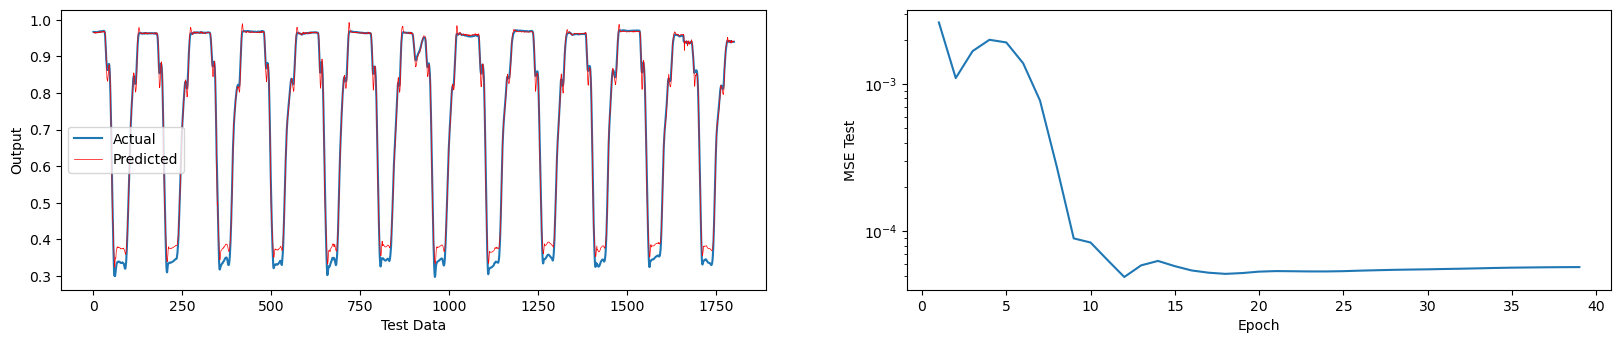

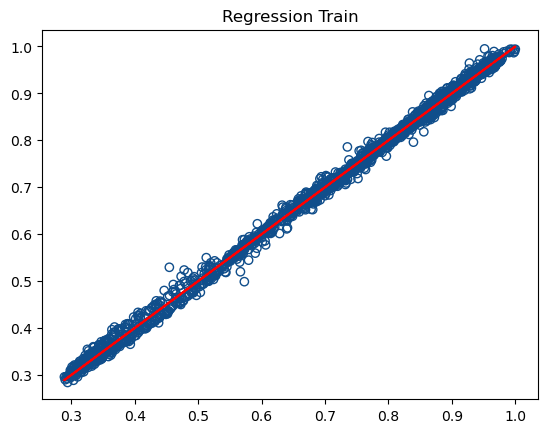

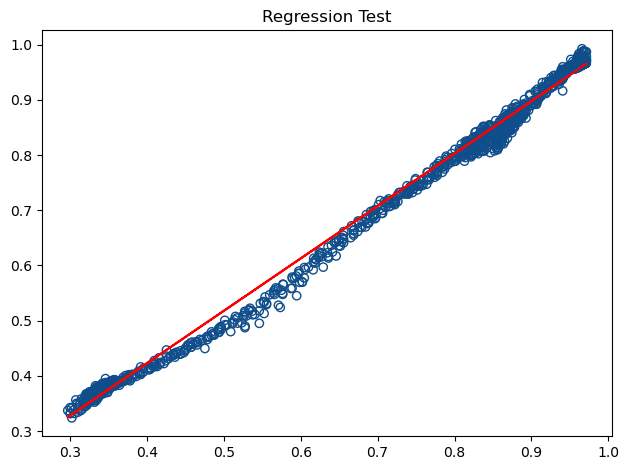

Final MSE on Train Data: 5.7170180565228564e-05
Final MSE on Test Data: 0.00038878177837890944


In [10]:
# Testing the trained MLP for regression
total_accuracy = 0 
error_data_test = np.zeros(len(X_test))
output_data_test = np.zeros(len(X_test))
for i in range(len(X_test)):
    input_layer = X_test[i:i+1]
    #print(input_layer.shape)

    net1 = np.dot(input_layer, w1)   # net1 = x * w1
    o1   = Function1(net1,𝛼1,𝛽1,𝛾1,𝛿1) #  o1 = f(net1)
      
    net2 = np.dot(o1, w2) # net2 = o1 * w2
    o2   = Function1(net2,𝛼2,𝛽2,𝛾2,𝛿2) #  o2 = f(net2)
        
    net3 = np.dot(o2, w3)   # net3 = o2 * w3
    o3   = Function1(net3,𝛼3,𝛽3,𝛾3,𝛿3) #  o3 = f(net3)
    
#     rounded_prediction = np.round(o4).astype(int)[0]
    output_data_test[i] = o3
    error_data_test[i] = y_test[i] -output_data_test[i]


# Plotting the test data and output
plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 1)
plt.plot(y_test)
plt.plot(output_data_test, 'r', linewidth=0.5)
plt.xlabel('Test Data')
plt.ylabel('Output')
plt.legend(['Actual', 'Predicted'])

# Plotting the training MSE
mse_train[epoch] = np.mean(error_data_train ** 2)
plt.subplot(2, 2, 2)
plt.semilogy(np.arange(1, epoch + 1), mse_train[:epoch])
plt.xlabel('Epoch')
plt.ylabel('MSE Train') 
    
print('Epoch: {} \t'.format(epoch+1))
print('total_error: ',total_error)
print('MSE_train: {:.4f}'.format(mse_train[epoch]))



# Plotting the test MSE
mse_test[epoch] = np.mean(error_data_test ** 2)
plt.subplot(2, 2, 2)
plt.semilogy(np.arange(1, epoch + 1), mse_test[:epoch])
plt.xlabel('Epoch')
plt.ylabel('MSE Test') 
    
print('Epoch: {} \t'.format(epoch+1))
print('MSE_test: {:.4f}'.format(mse_test[epoch]))
    

plt.figure(2)
m_train , b_train = np.polyfit(y_train, output_data_train, 1)    
plt.scatter(y_train, output_data_train,facecolors='none',edgecolors='#104E8B')
plt.plot(y_train, m_train*y_train+b_train,'r') 
plt.title('Regression Train') 

plt.figure(3)
m_test , b_test = np.polyfit(y_test, output_data_test, 1)  
plt.scatter(y_test, output_data_test,facecolors='none',edgecolors='#104E8B')
plt.plot(y_test, m_test*y_test+b_test,'r')
plt.title('Regression Test')
 
plt.tight_layout()
plt.show()

mse_train_result = mse_train[-1]
mse_test_result = mse_test[-1]

print("Final MSE on Train Data:", mse_train_result)
print("Final MSE on Test Data:", mse_test_result)
